In [14]:
import datetime as dt
from concurrent.futures import ProcessPoolExecutor
import numpy as np
import pandas as pd
import xlwings as xw
import pymysql
import calendar
import json
import math
import matplotlib.pyplot as plt
from scipy import optimize
import sys
import mplfinance as mpf



pd.options.display.float_format = '{:.4f}'.format

In [15]:
# MySQL 서버에 연결
connection = pymysql.connect(
    host="127.0.0.1",  # MySQL 서버의 주소
    user="root",        # MySQL 사용자 이름
    port=3306,
    database='crypto',
    password="cdfha!3579",  # 비밀번호
    charset='utf8'
)
cur = connection.cursor()

query = "SELECT * FROM btcusdt1mf"
df = pd.read_sql(query, connection)

# 데이터 출력 확인
print(df)

# 연결 종료
connection.close()

df['Open time'] = pd.to_datetime(df['Open time'], unit ='ms')
df.set_index('Open time', inplace=True)
df = df[df['Volume'] > 0]



C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\467272929.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


             Open time       Open       High        Low      Close    Volume  \
0        1577750400000  7240.8000  7240.8000  7211.0000  7213.3700  667.3230   
1        1577750460000  7213.3700  7218.9100  7190.0000  7209.3900 1441.5500   
2        1577750520000  7209.7500  7211.3300  7200.0000  7204.2000  231.4940   
3        1577750580000  7204.0200  7213.1400  7201.7800  7213.1400  168.9620   
4        1577750640000  7213.1400  7215.0000  7203.7200  7204.1600  187.7760   
...                ...        ...        ...        ...        ...       ...   
2632315  1735689300000 93624.5000 93649.8000 93624.5000 93649.8000   65.5410   
2632316  1735689360000 93649.9000 93661.9000 93610.0000 93610.1000   24.7800   
2632317  1735689420000 93610.0000 93617.1000 93585.3000 93585.3000   17.4870   
2632318  1735689480000 93585.3000 93593.0000 93567.1000 93570.8000   17.9300   
2632319  1735689540000 93570.7000 93591.6000 93548.9000 93548.9000   25.4080   

            Close time  Quote asset vol

In [17]:
def create_daily_timestamp_list(start_date, end_date):
    # 시작 날짜와 끝 날짜 사이의 일별 타임스탬프 리스트 생성
    daily_list = pd.date_range(start=start_date, end=end_date, freq='D')
    return daily_list

def red_black_3_candle(row):

    # 현재 값이 이전 값보다 크면 1, 그렇지 않으면 0
    first_candle_open = df['Open'].shift(2).loc[row.name]
    first_candle_close = df['Close'].shift(2).loc[row.name]

    second_candle_open = df['Open'].shift(1).loc[row.name]
    second_candle_close = df['Close'].shift(1).loc[row.name]

    third_candle_open = df['Open'].loc[row.name]
    third_candle_close = df['Close'].loc[row.name]

    if ((first_candle_close - first_candle_open) > 0) & ((second_candle_close - second_candle_open) > 0) & ((third_candle_close - third_candle_open) > 0) :
        if (third_candle_close > second_candle_close) & (second_candle_close > first_candle_close) :
            return 'red'
    
    elif ((first_candle_open - first_candle_close) > 0) & ((second_candle_open - second_candle_close) > 0) & ((third_candle_open - third_candle_close) > 0) :
        if (first_candle_close > second_candle_close) & (second_candle_close > third_candle_close) :
            return 'black'
    else :
        return None

In [18]:
df['red_black_3_candle'] = df.apply(lambda row : red_black_3_candle(row), axis=1)
df['day'] = df.index.normalize()

2024-12-01 00:00:00 104.43552078342398


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


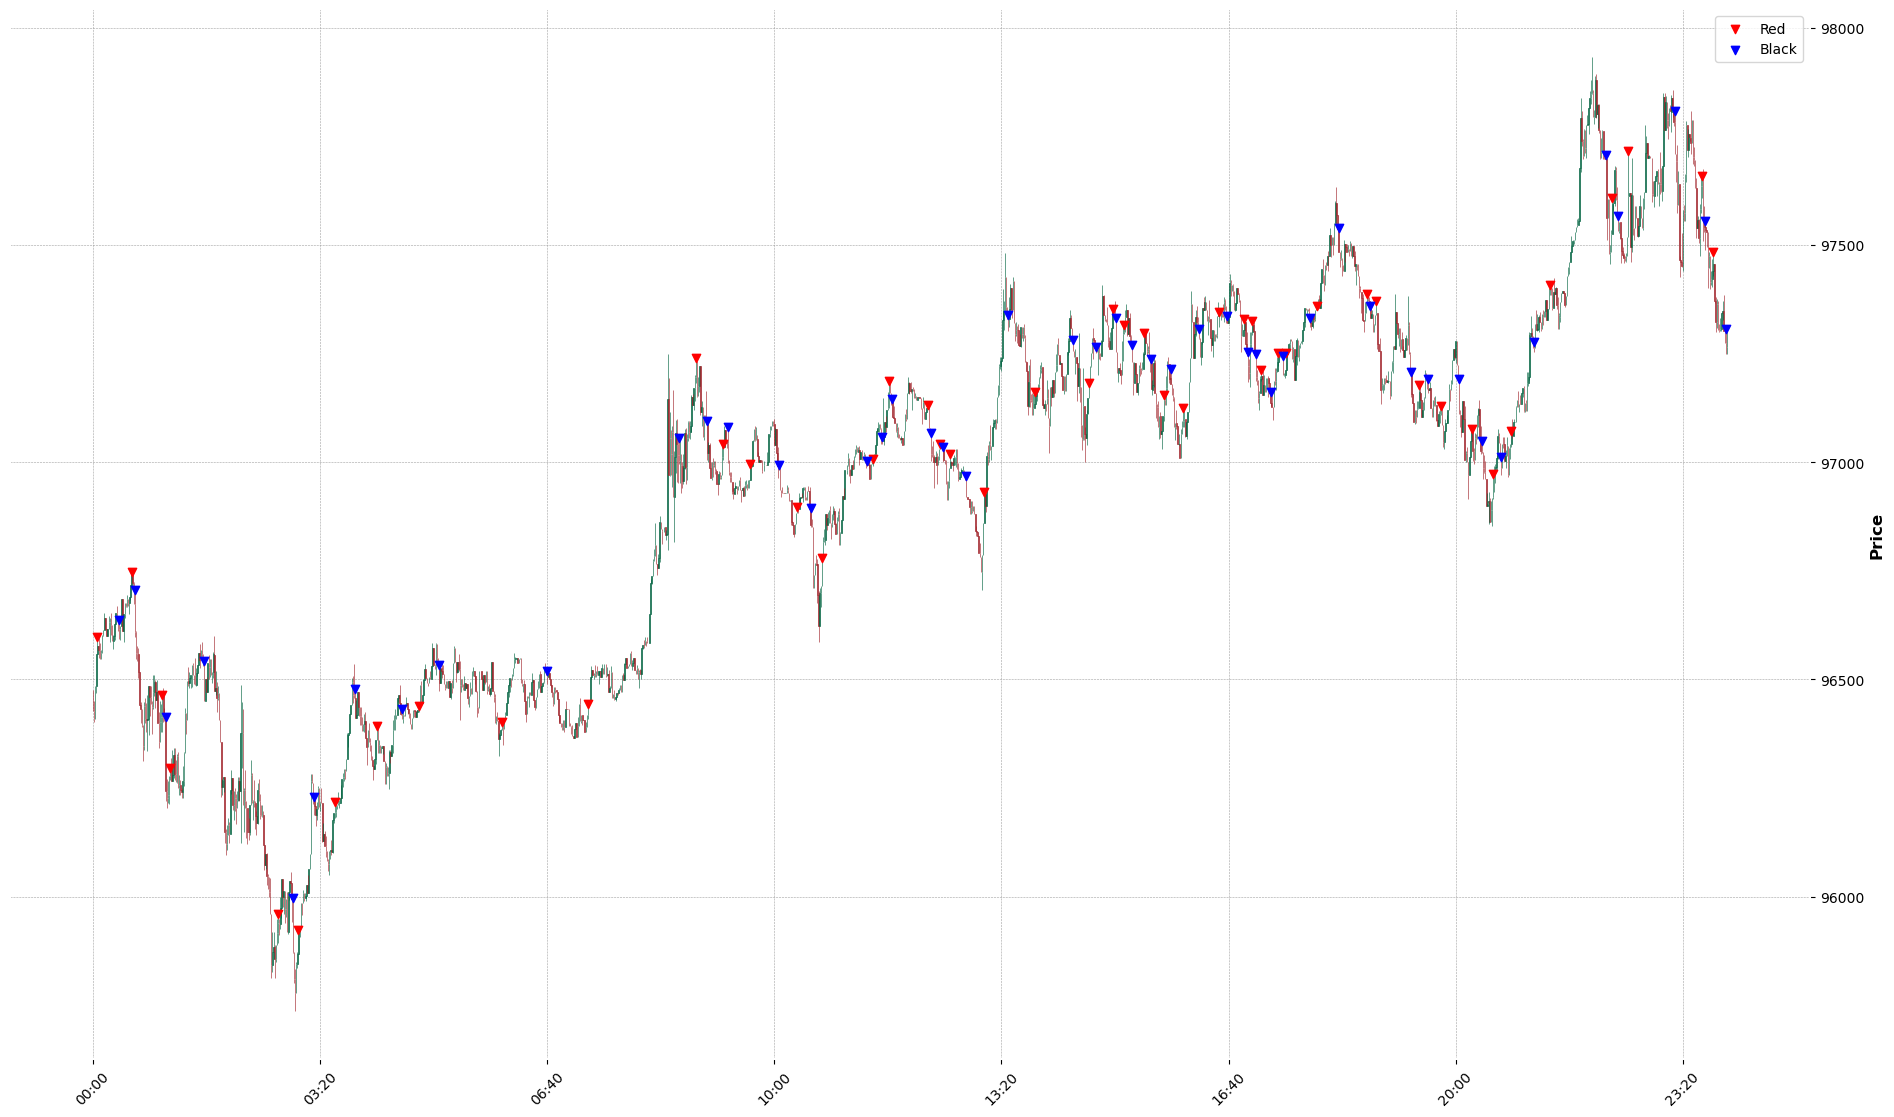

2024-12-02 00:00:00 111.59522148542477


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


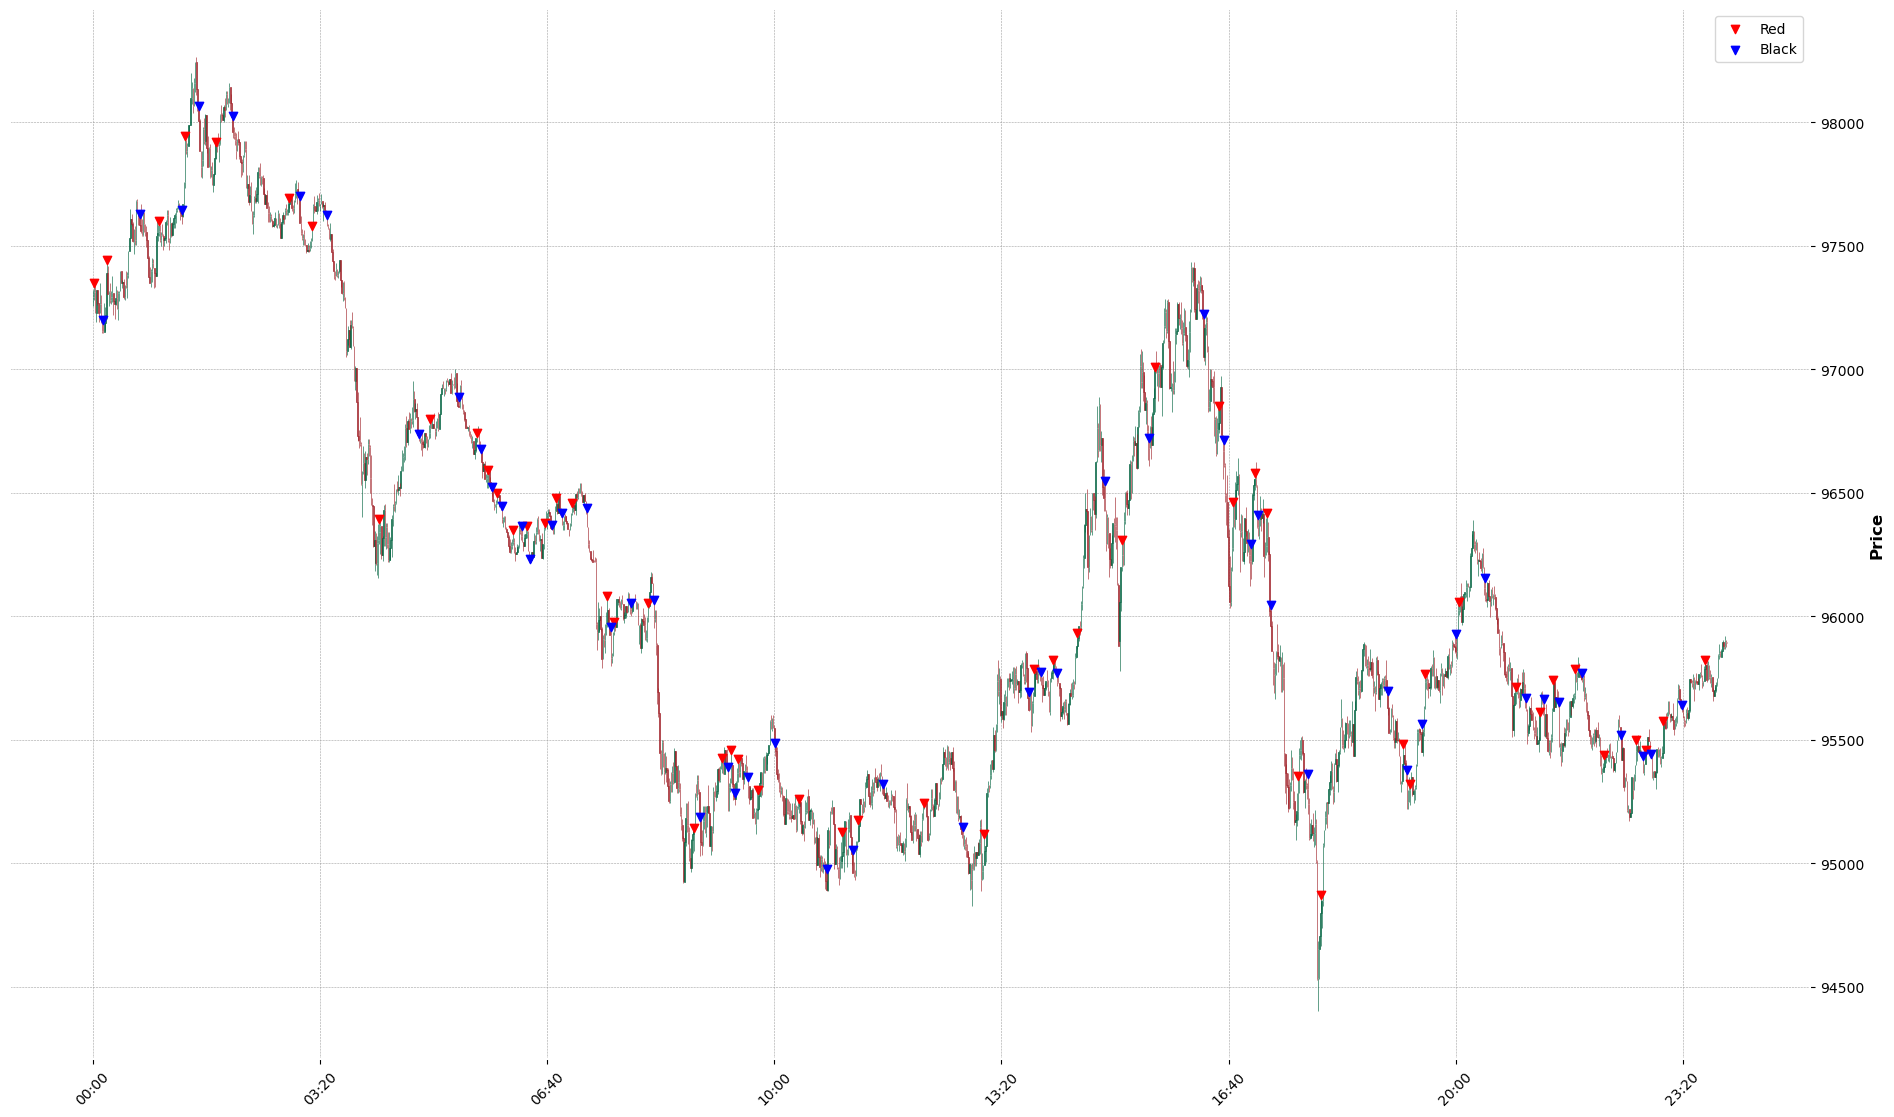

2024-12-03 00:00:00 120.30325426008869


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


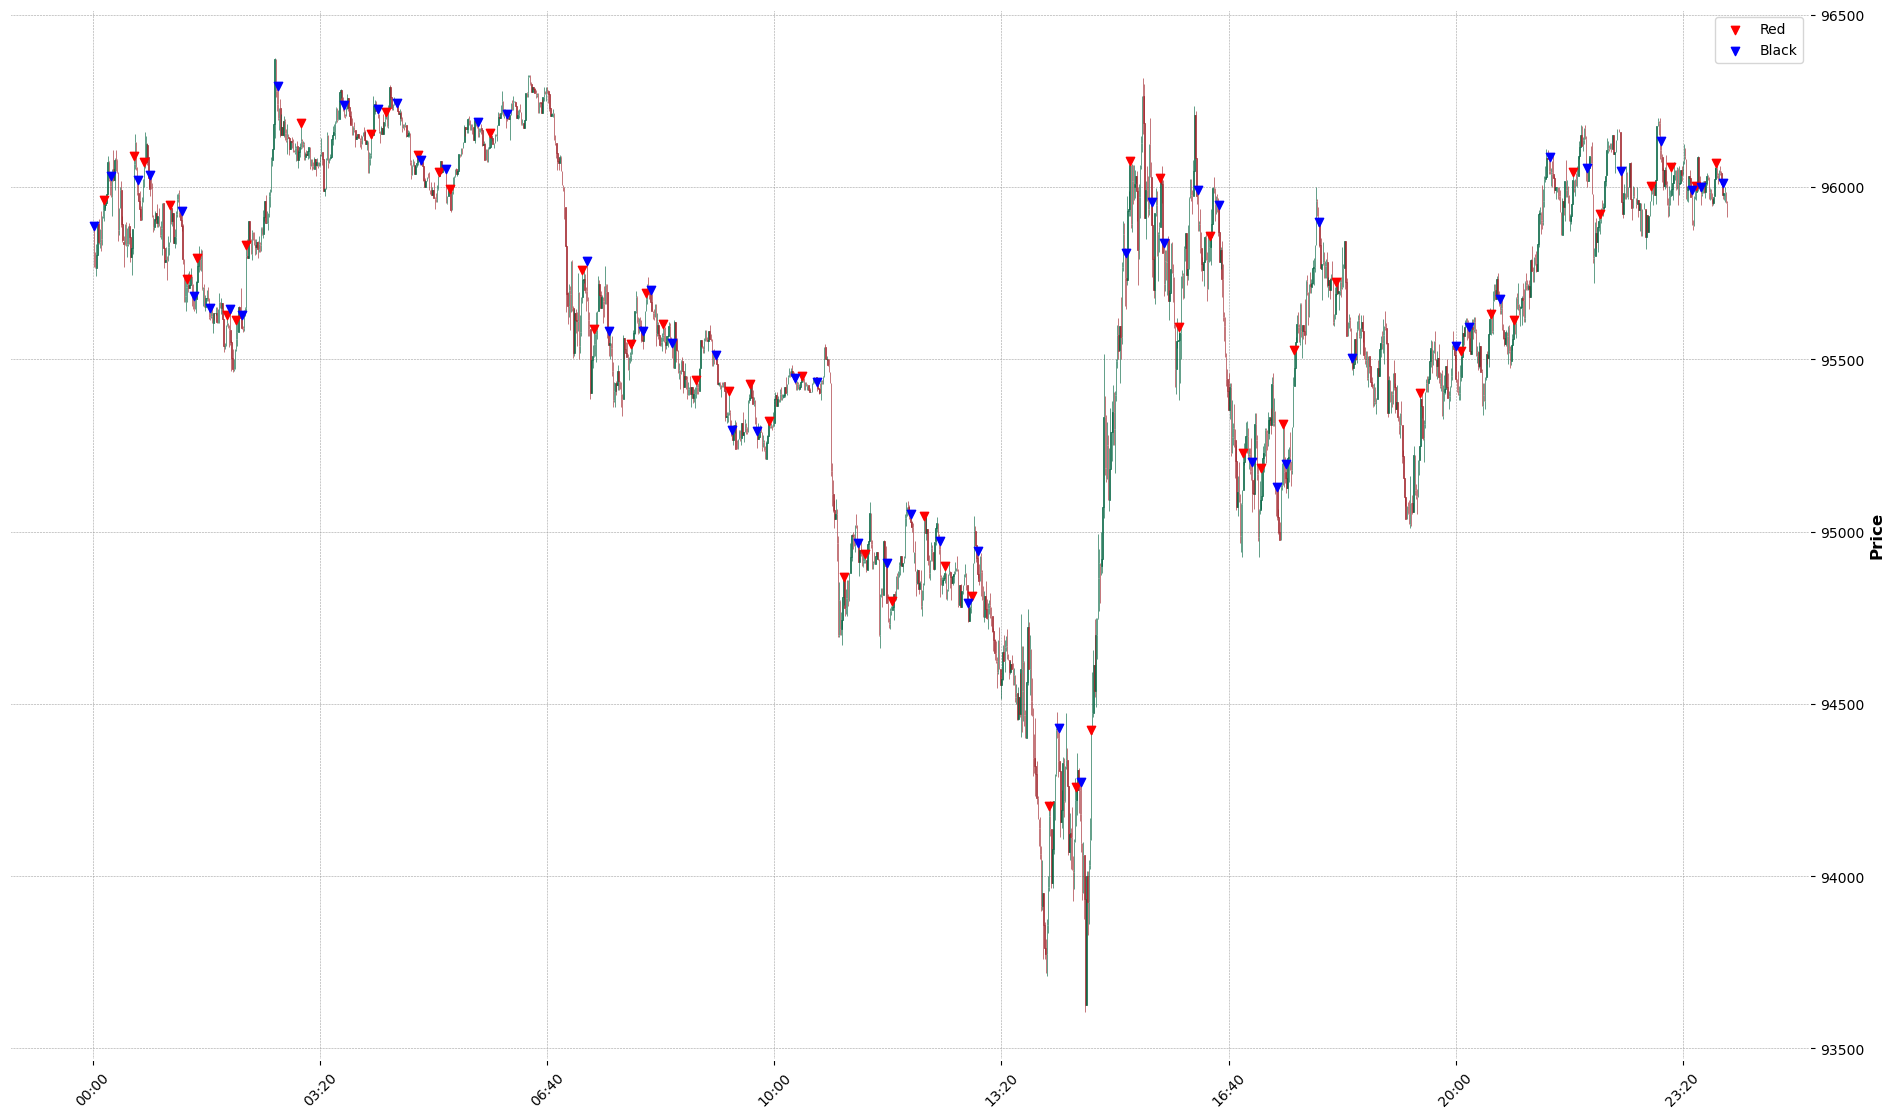

2024-12-04 00:00:00 127.36783673268172


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


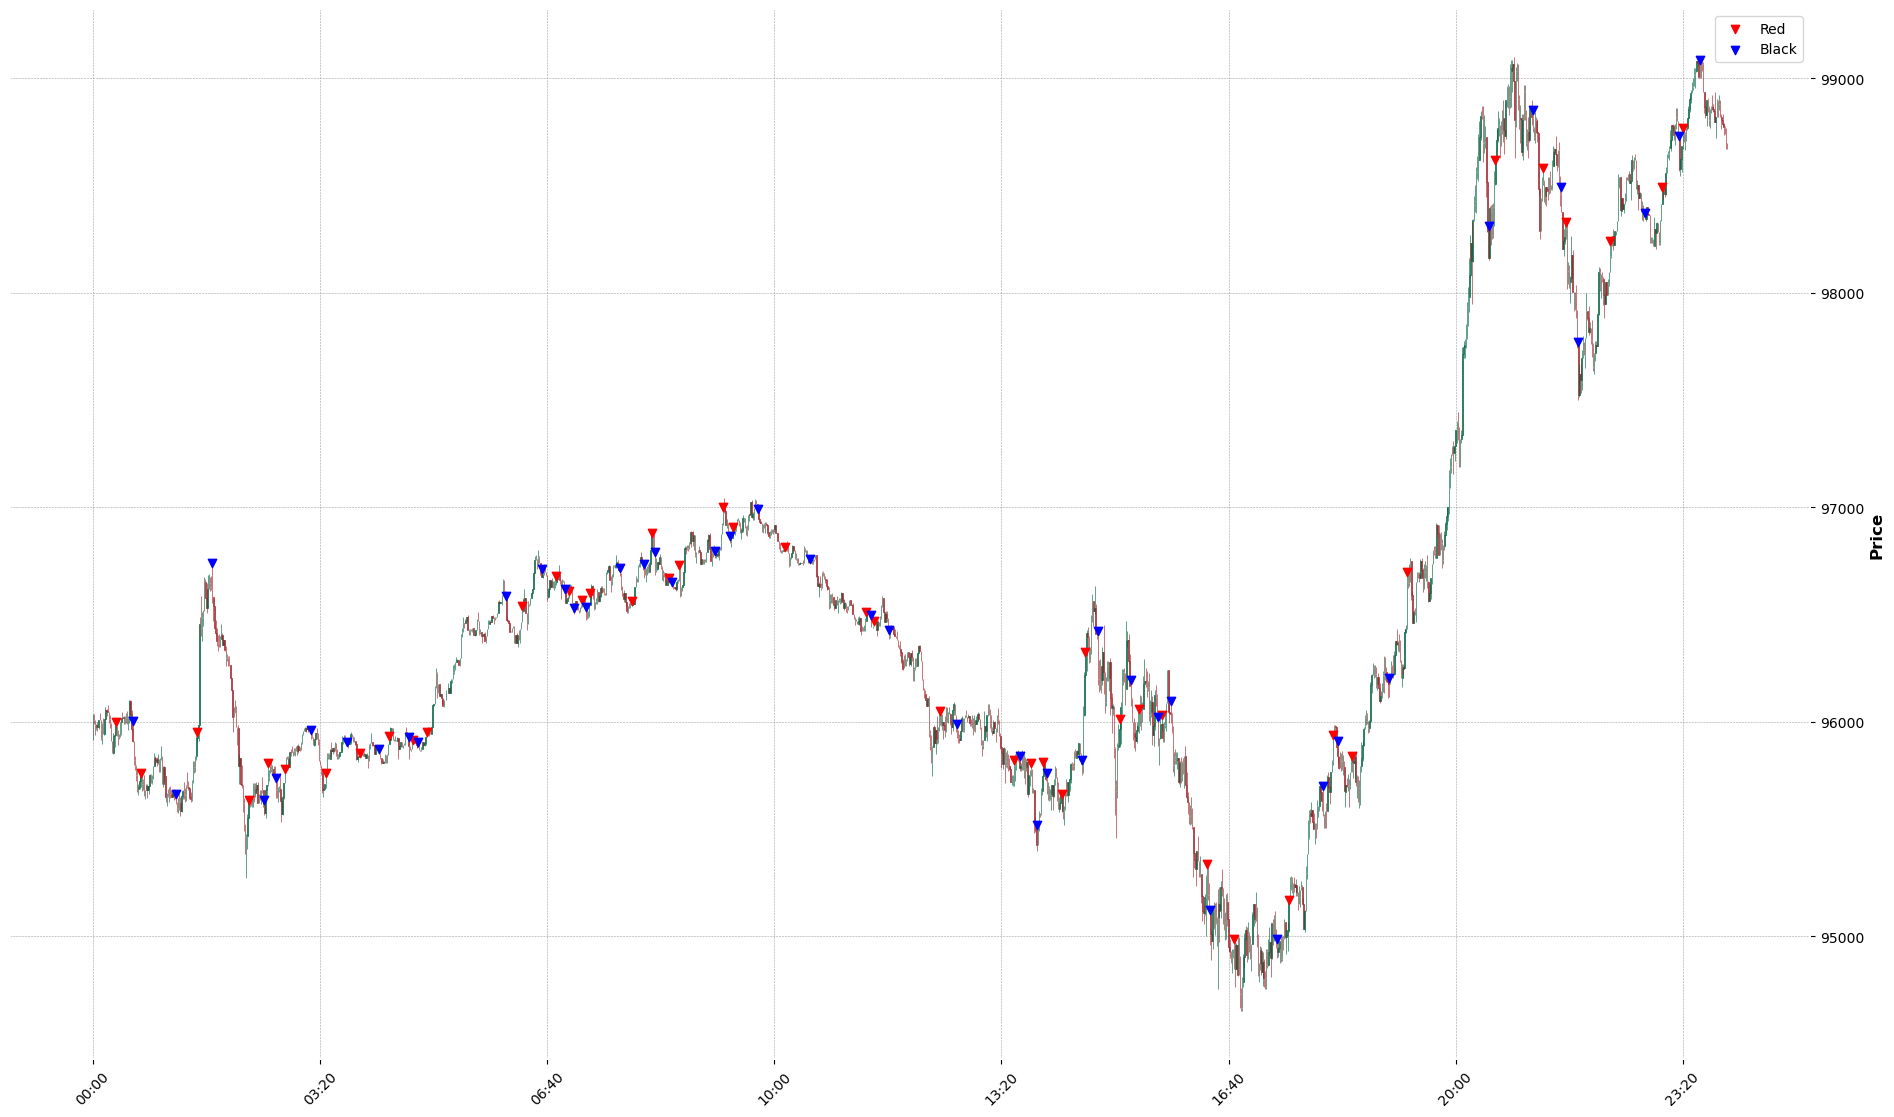

2024-12-05 00:00:00 146.47152096496762


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


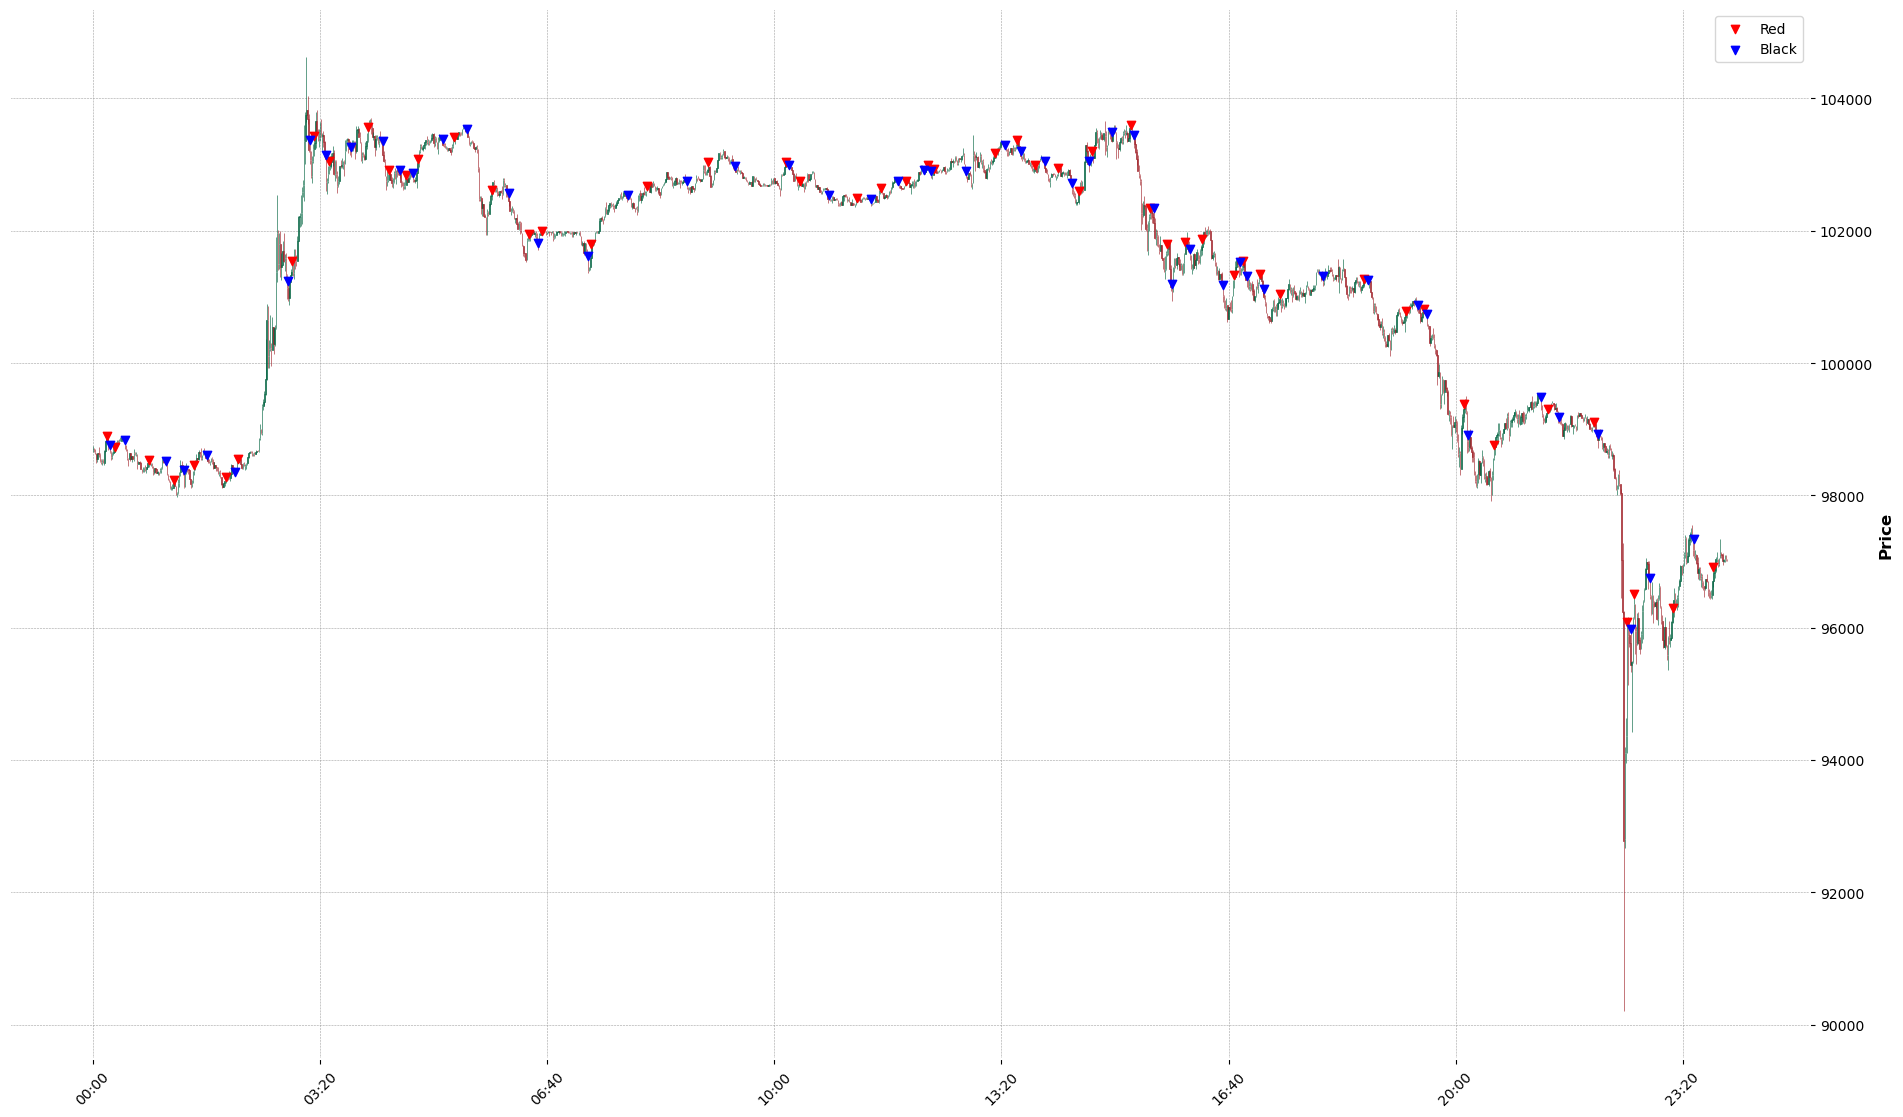

2024-12-06 00:00:00 151.0487576929498


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


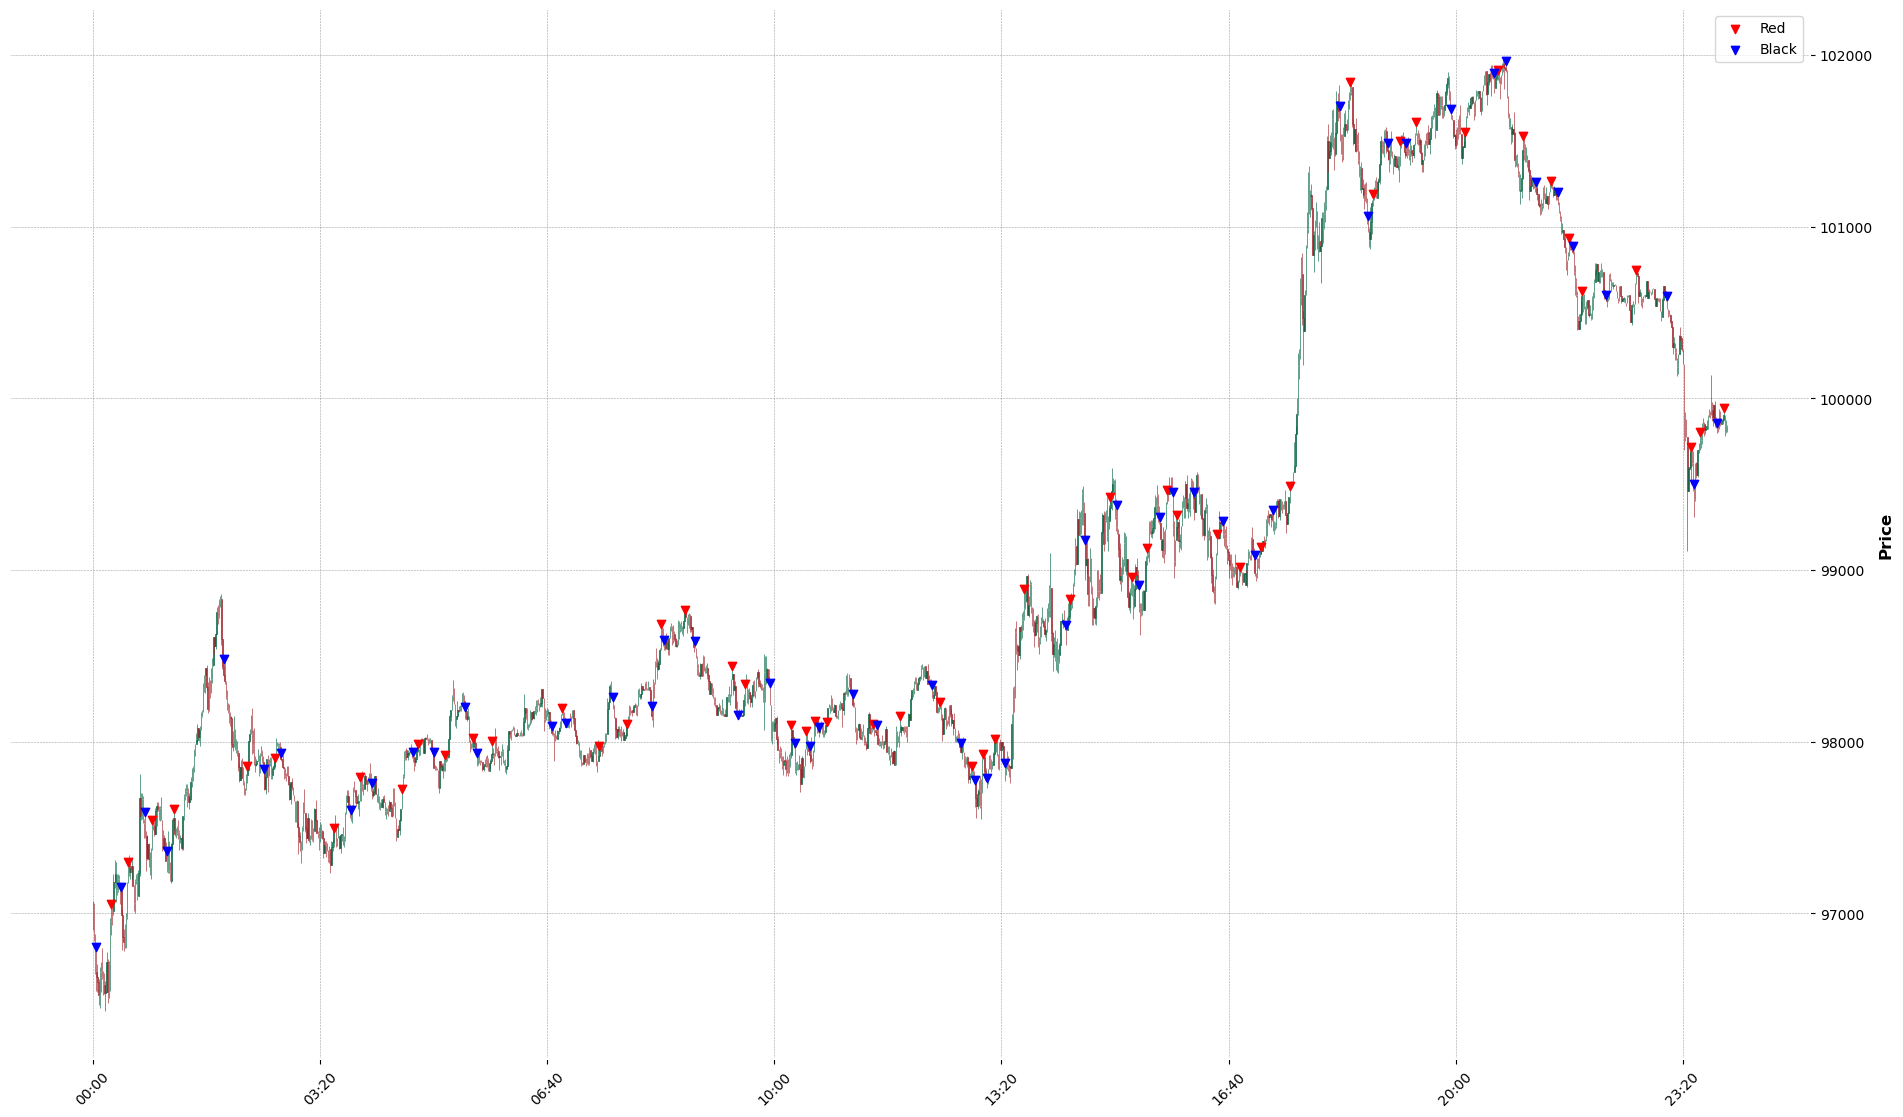

2024-12-07 00:00:00 156.05836744837683


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


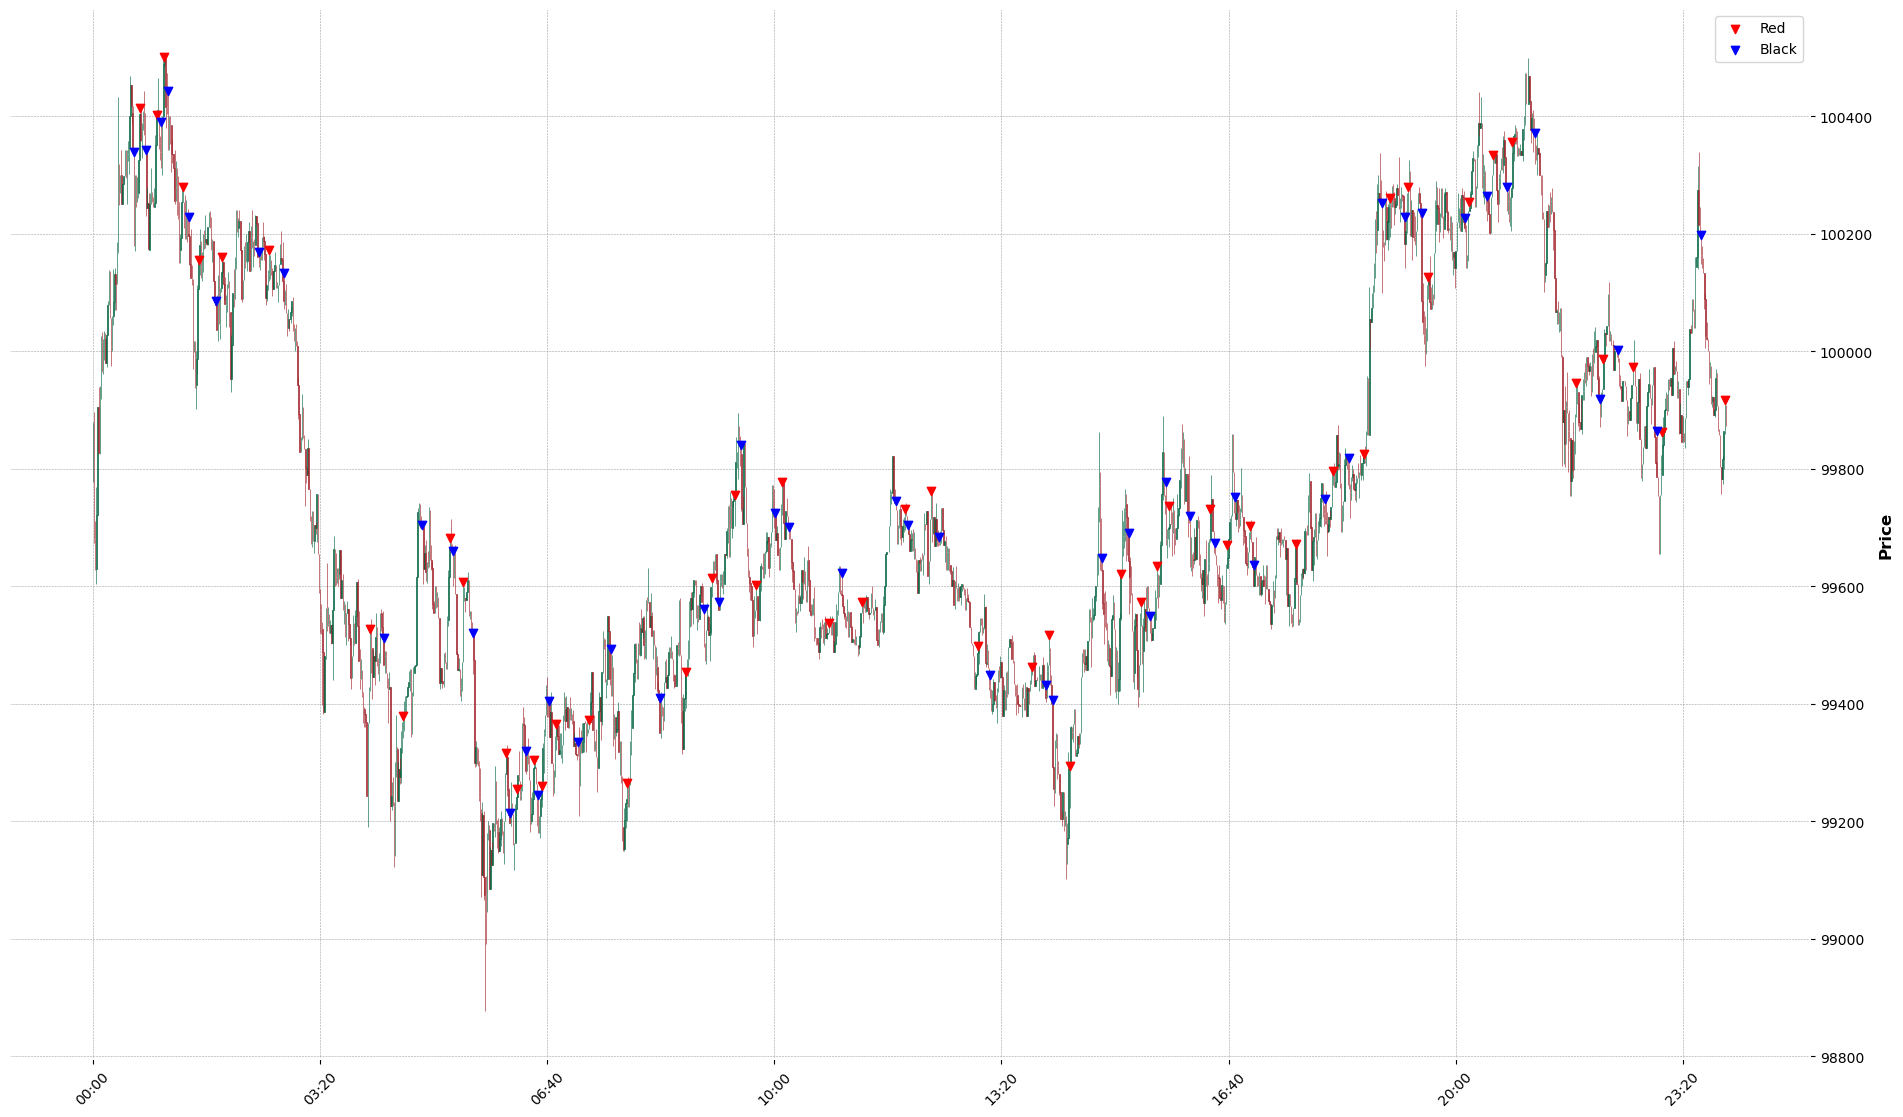

2024-12-08 00:00:00 157.15160758807997


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


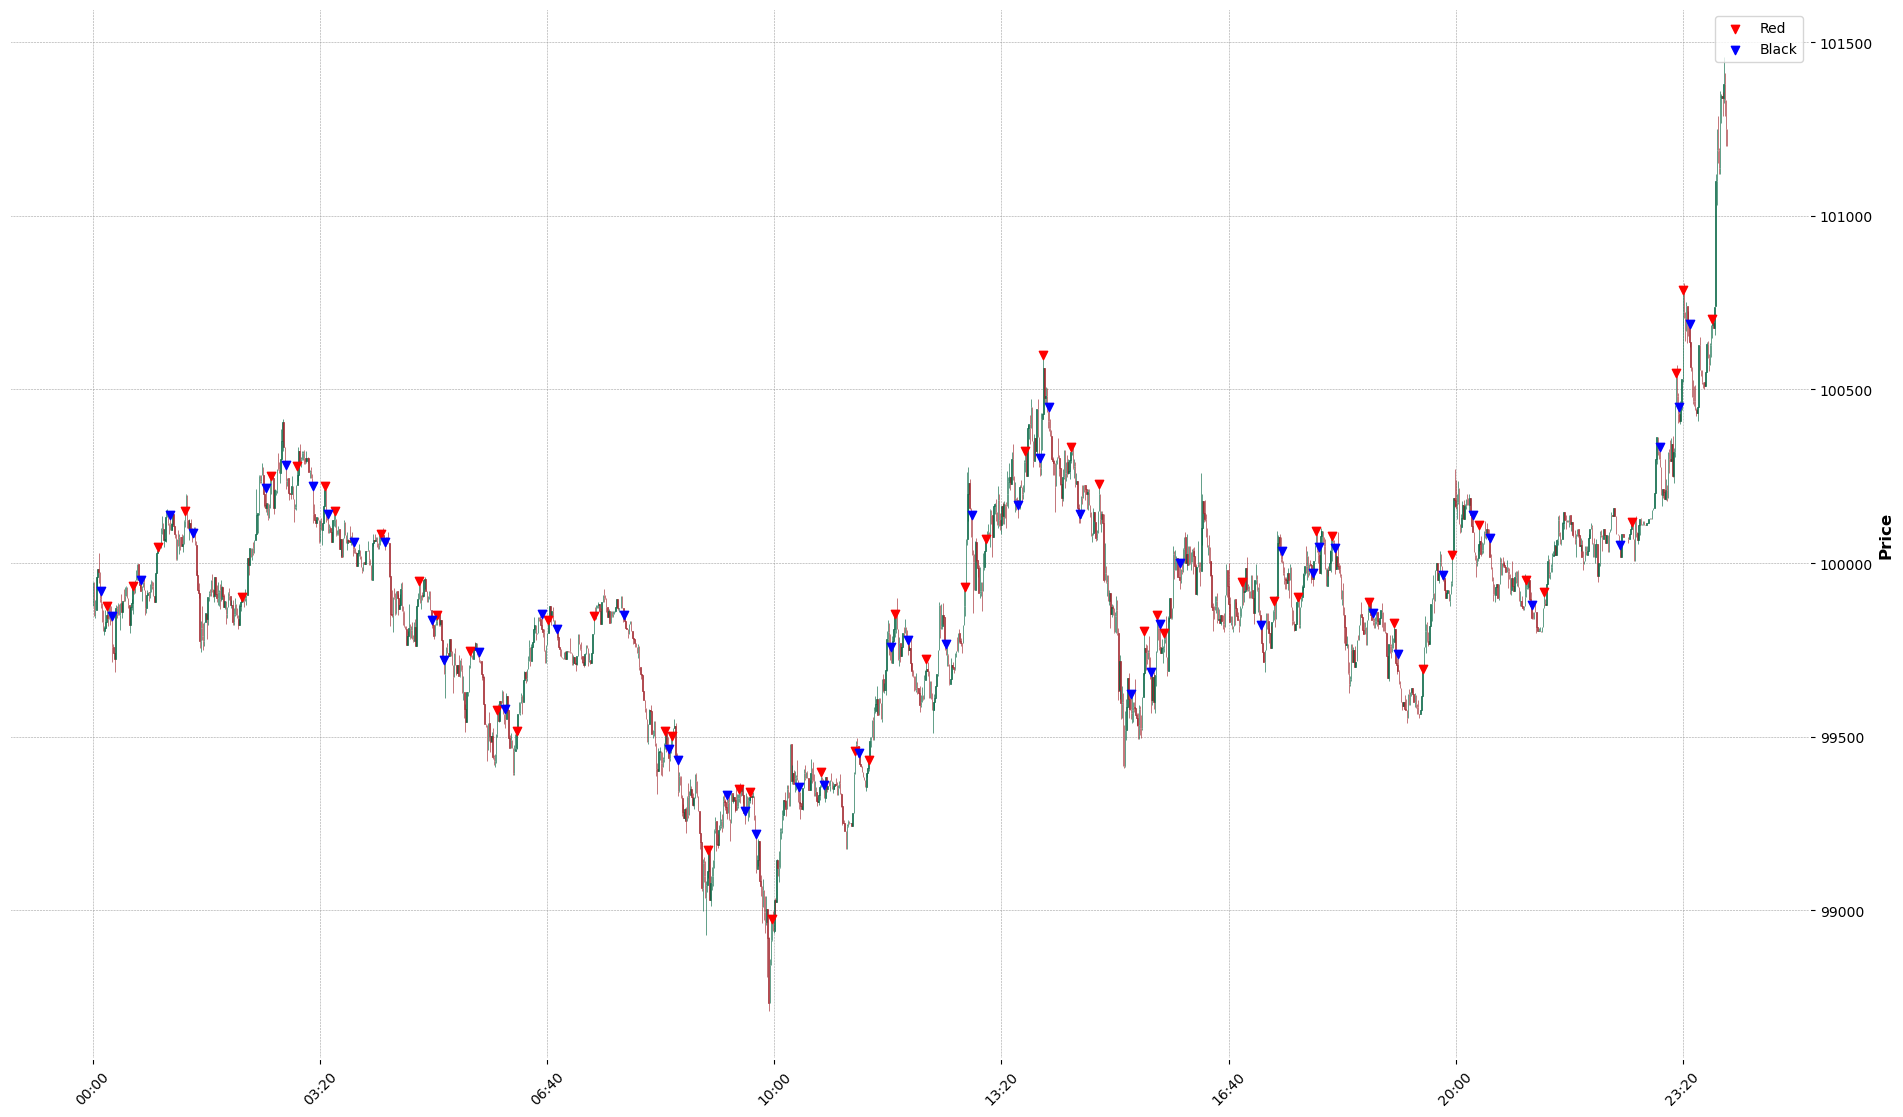

2024-12-09 00:00:00 170.52861180819514


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


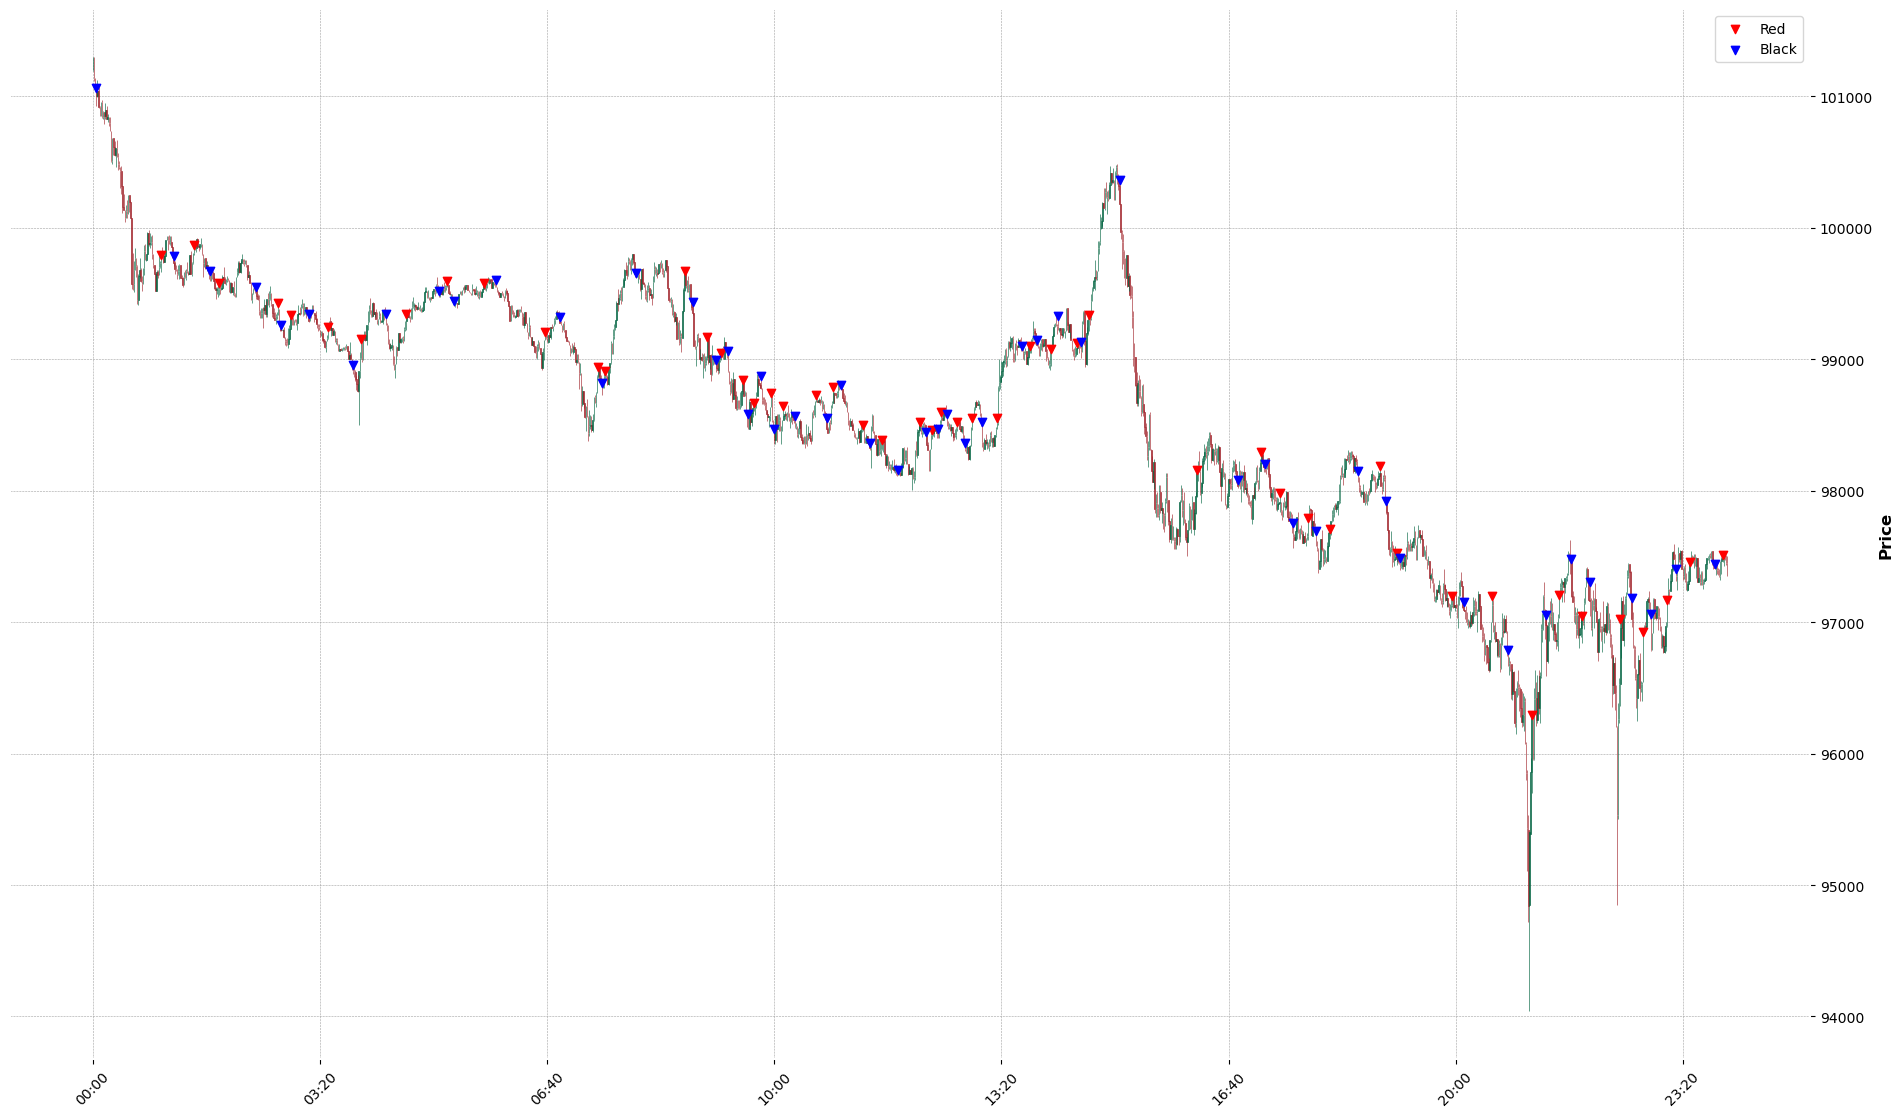

2024-12-10 00:00:00 184.05484880211105


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


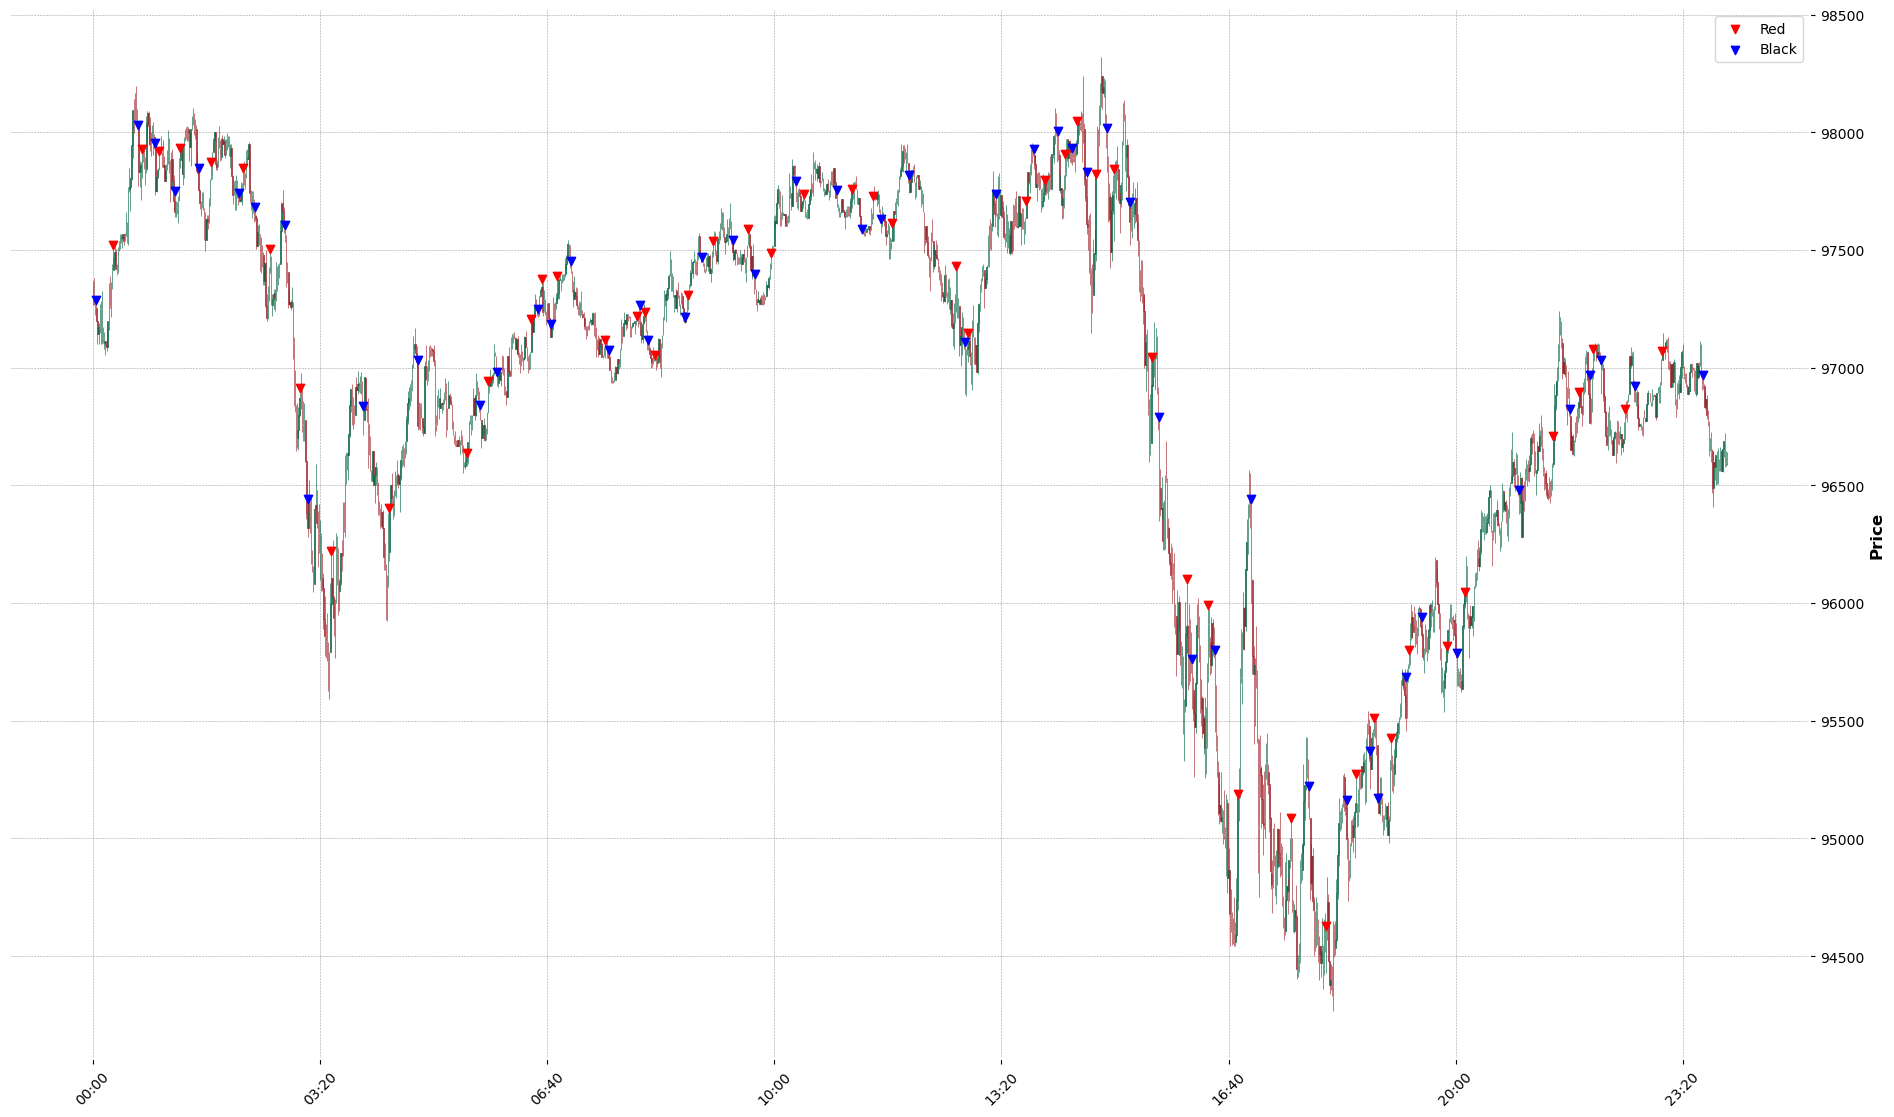

2024-12-11 00:00:00 198.5973554987688


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


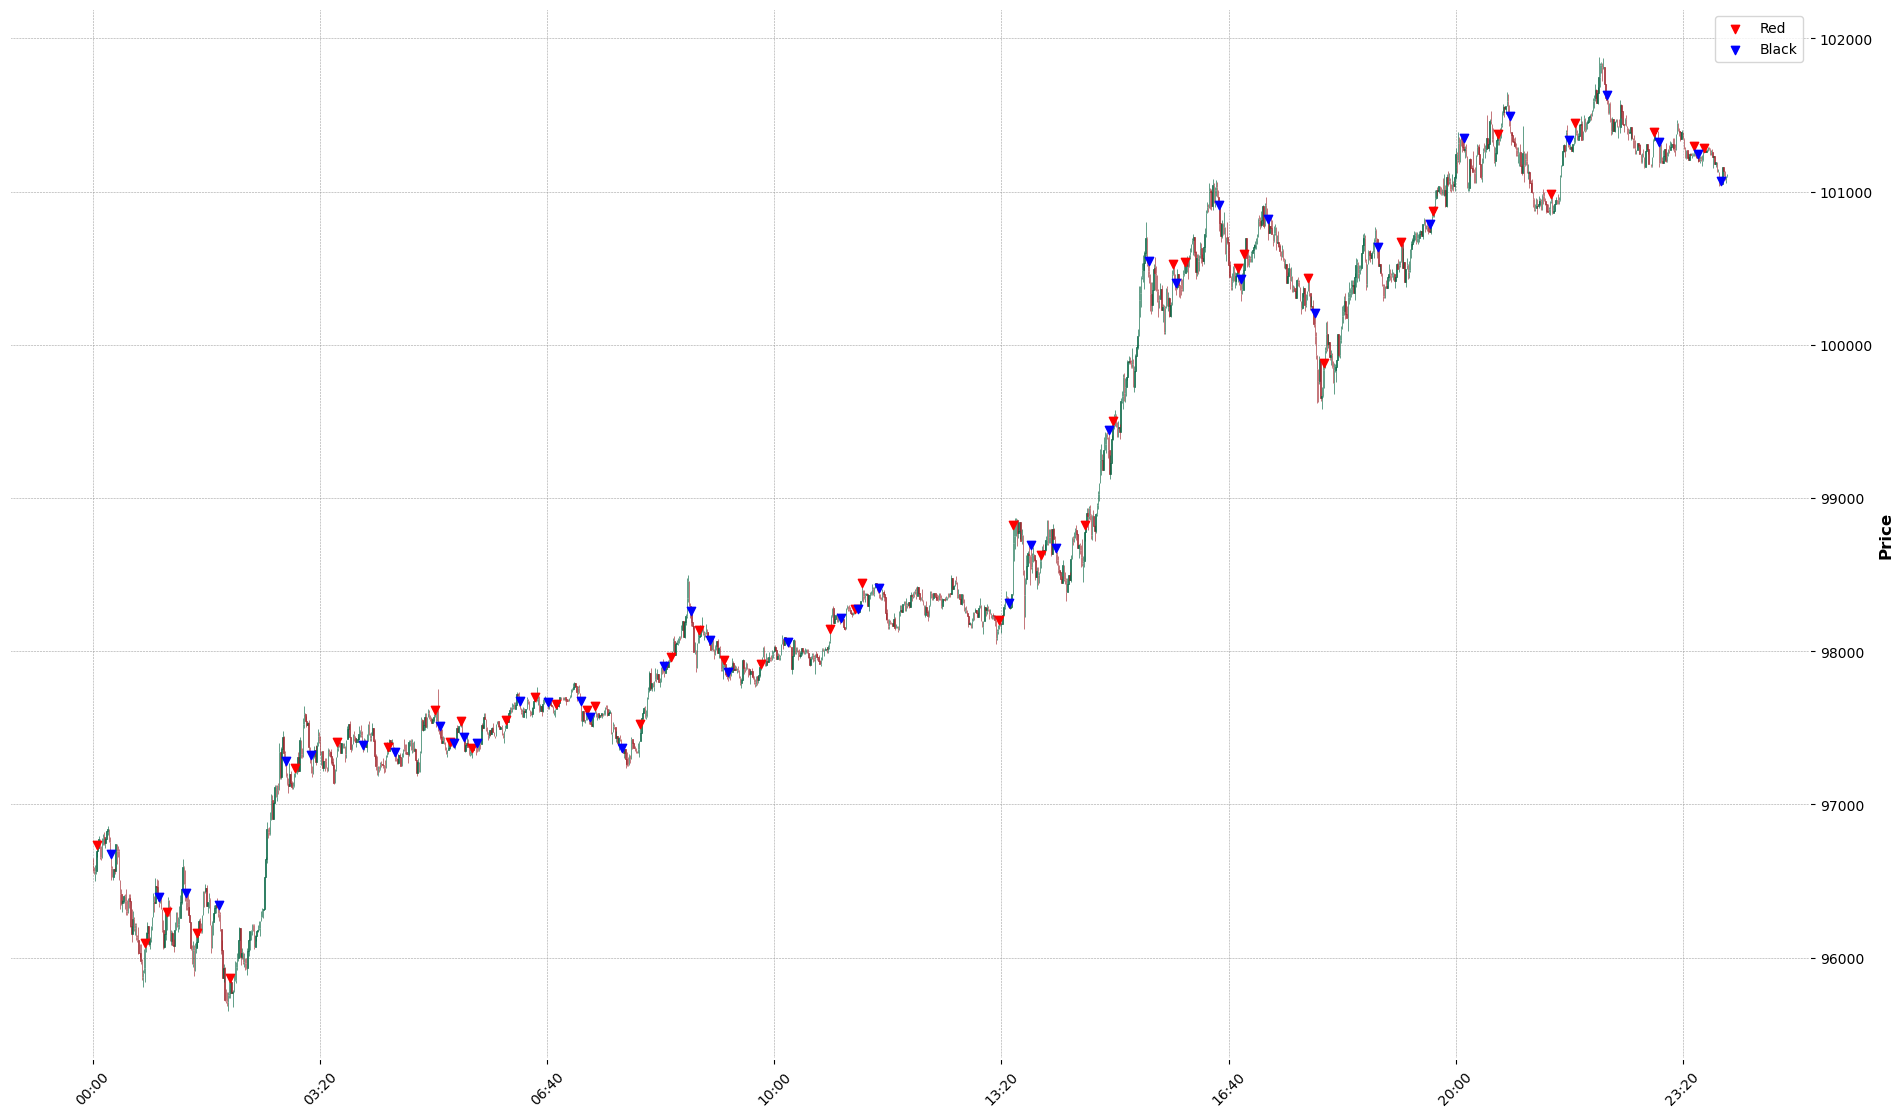

2024-12-12 00:00:00 209.4382961612324


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


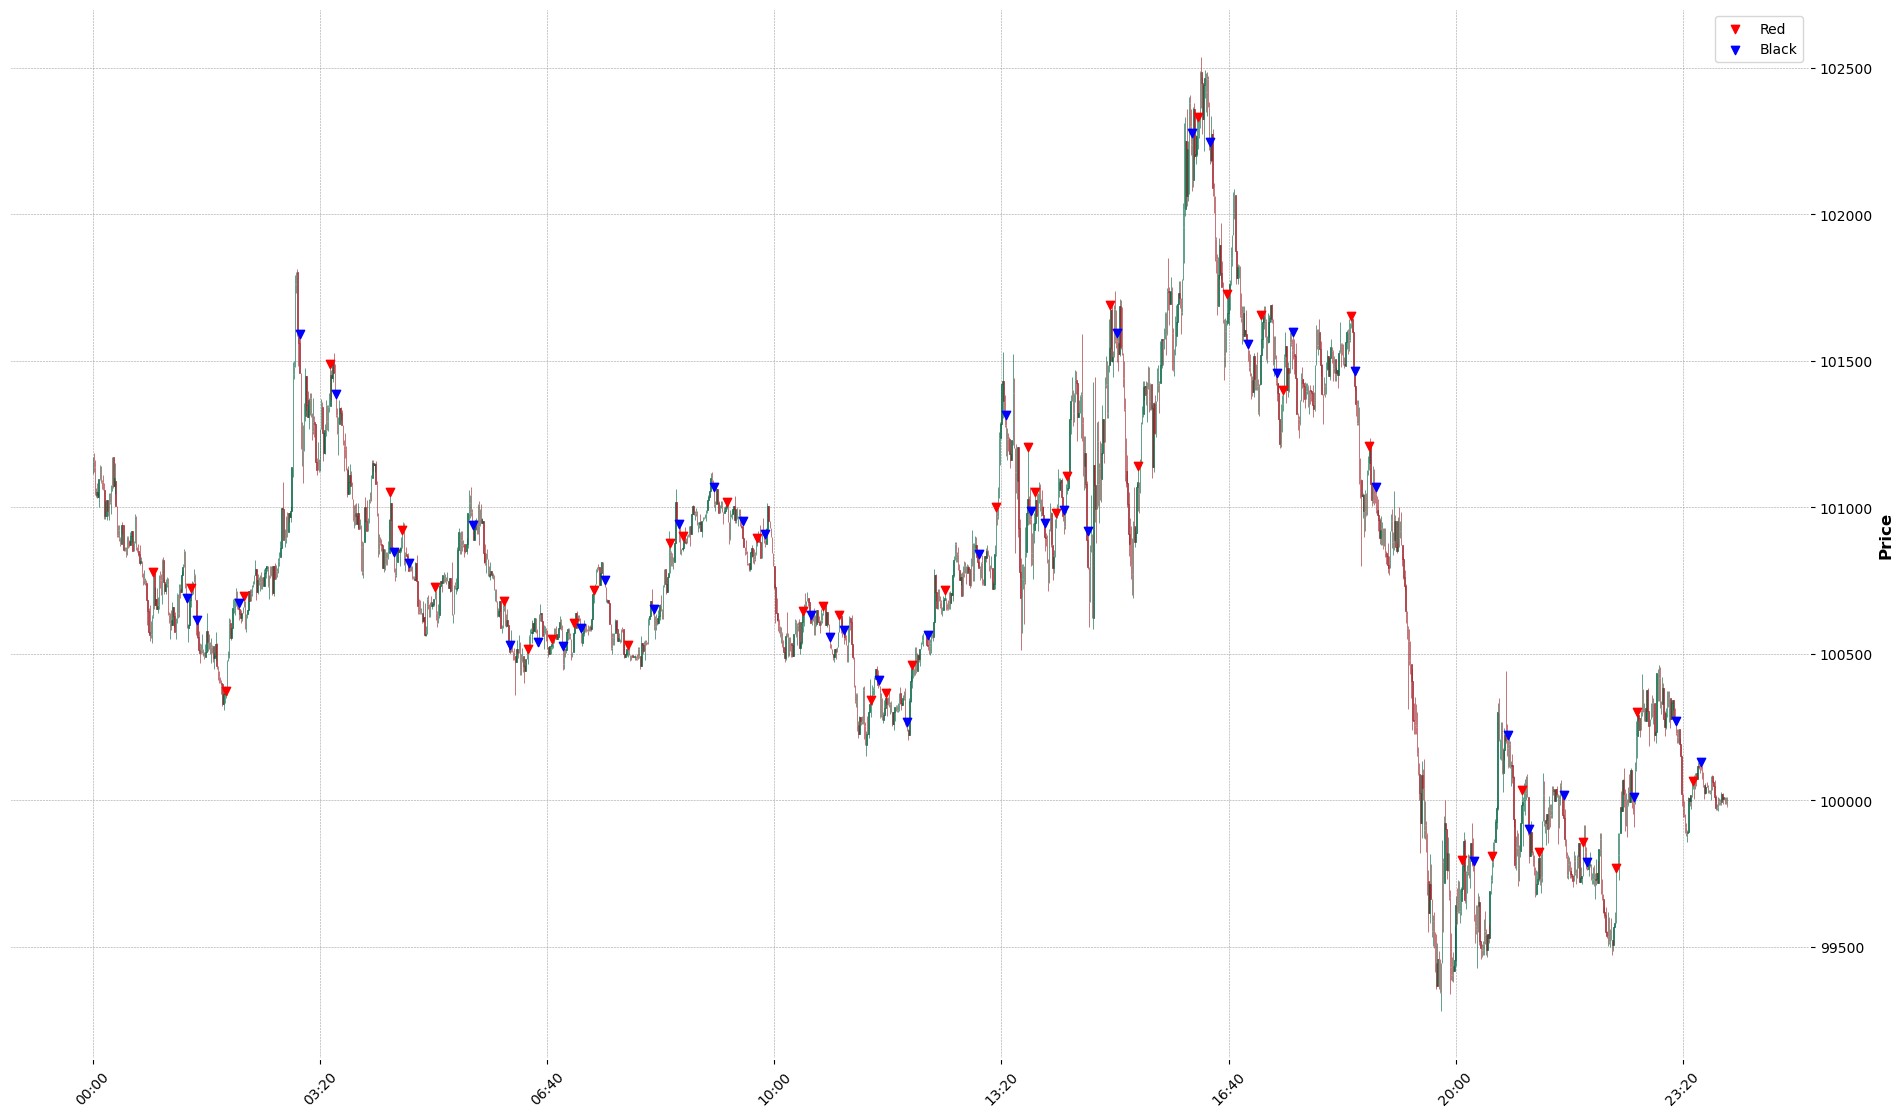

2024-12-13 00:00:00 212.60153303063956


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


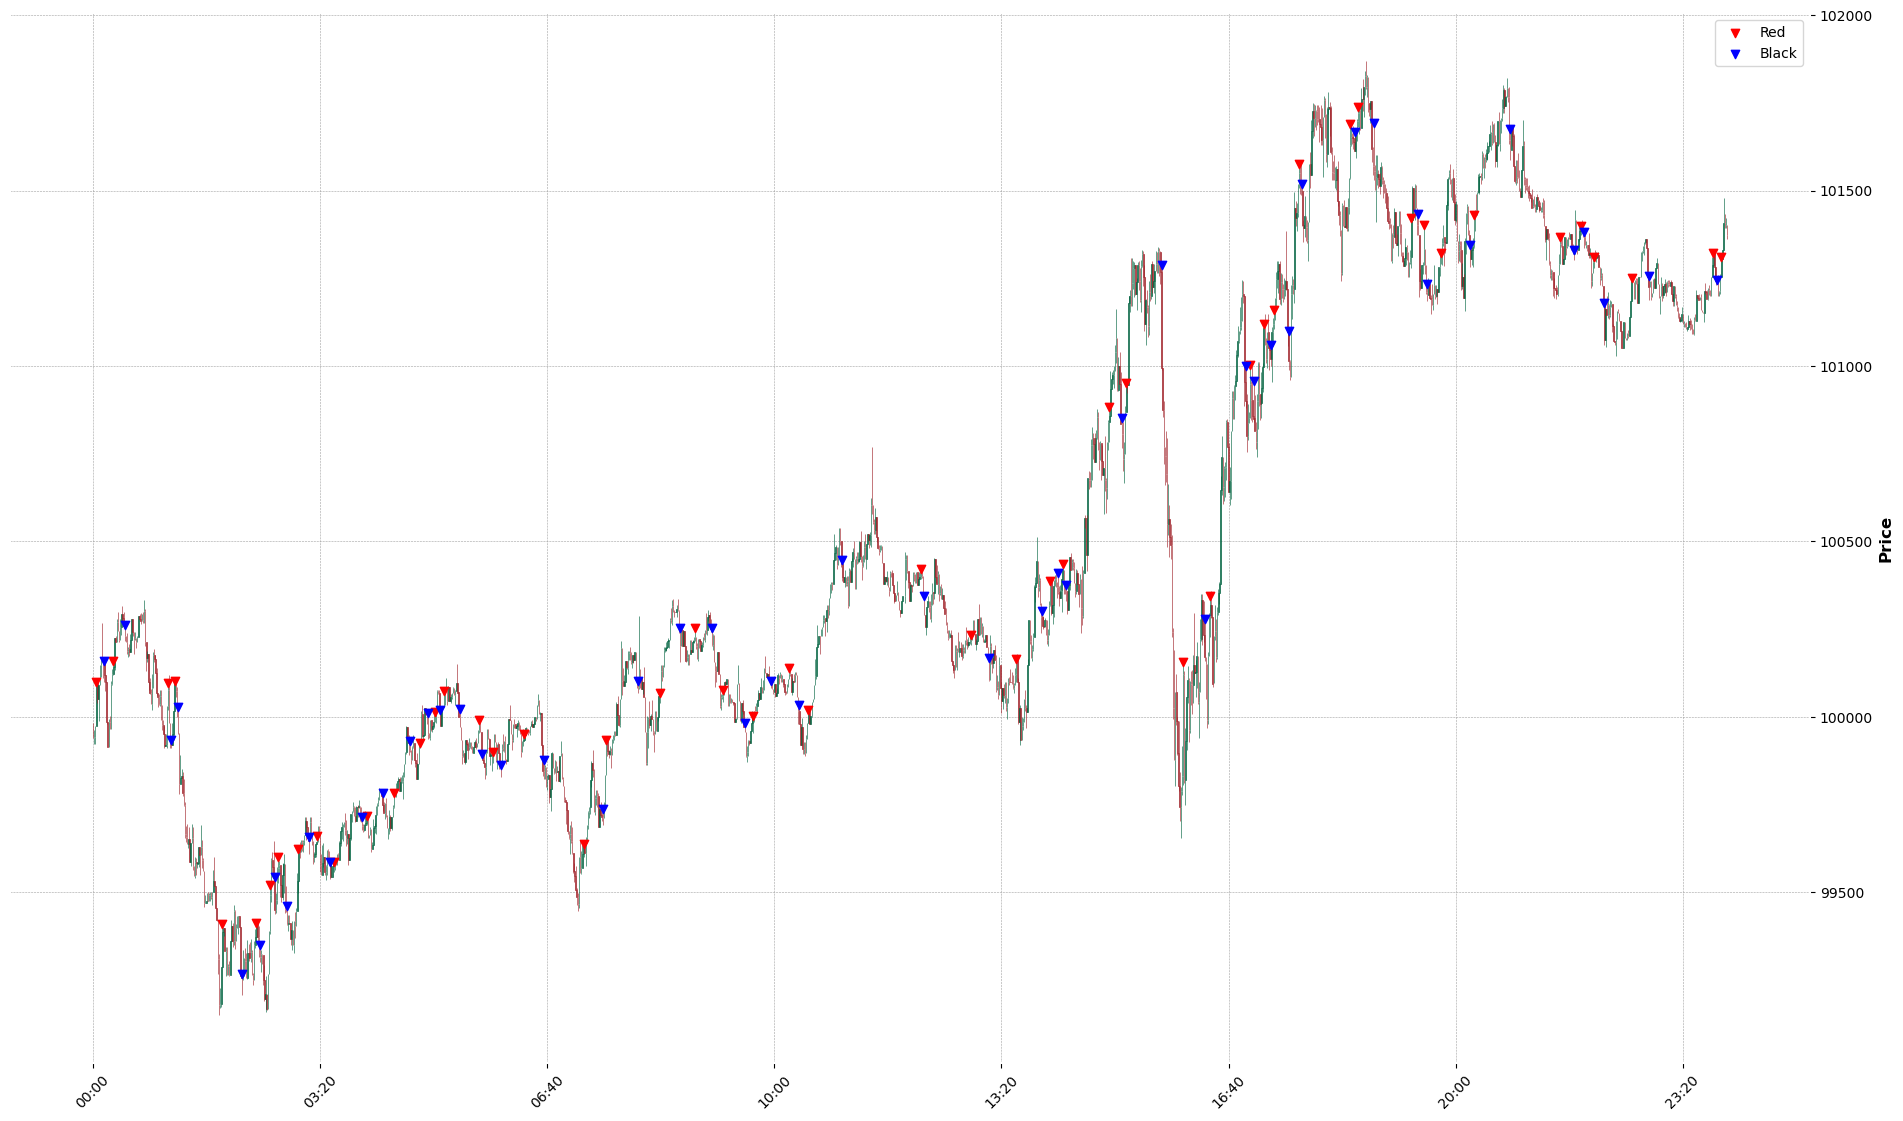

2024-12-14 00:00:00 221.6970967485554


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


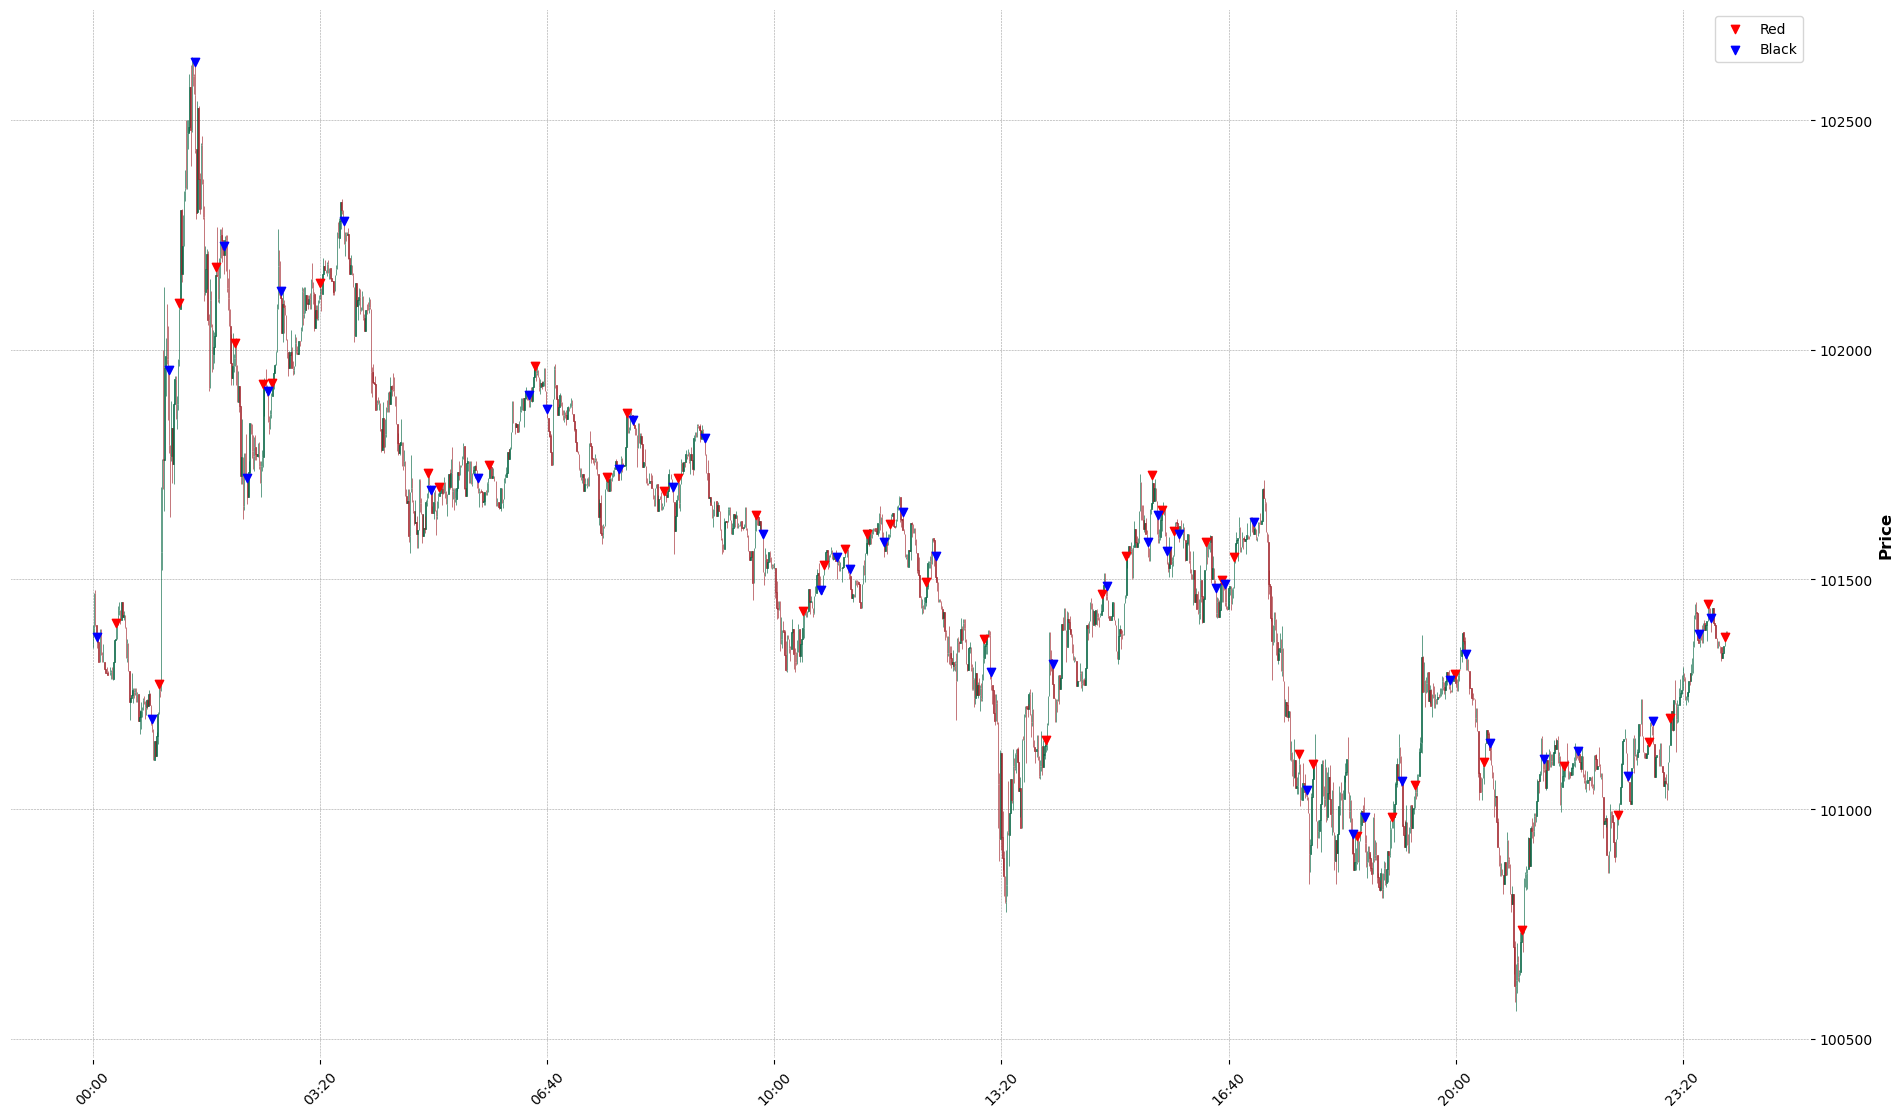

2024-12-15 00:00:00 232.39307073933787


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


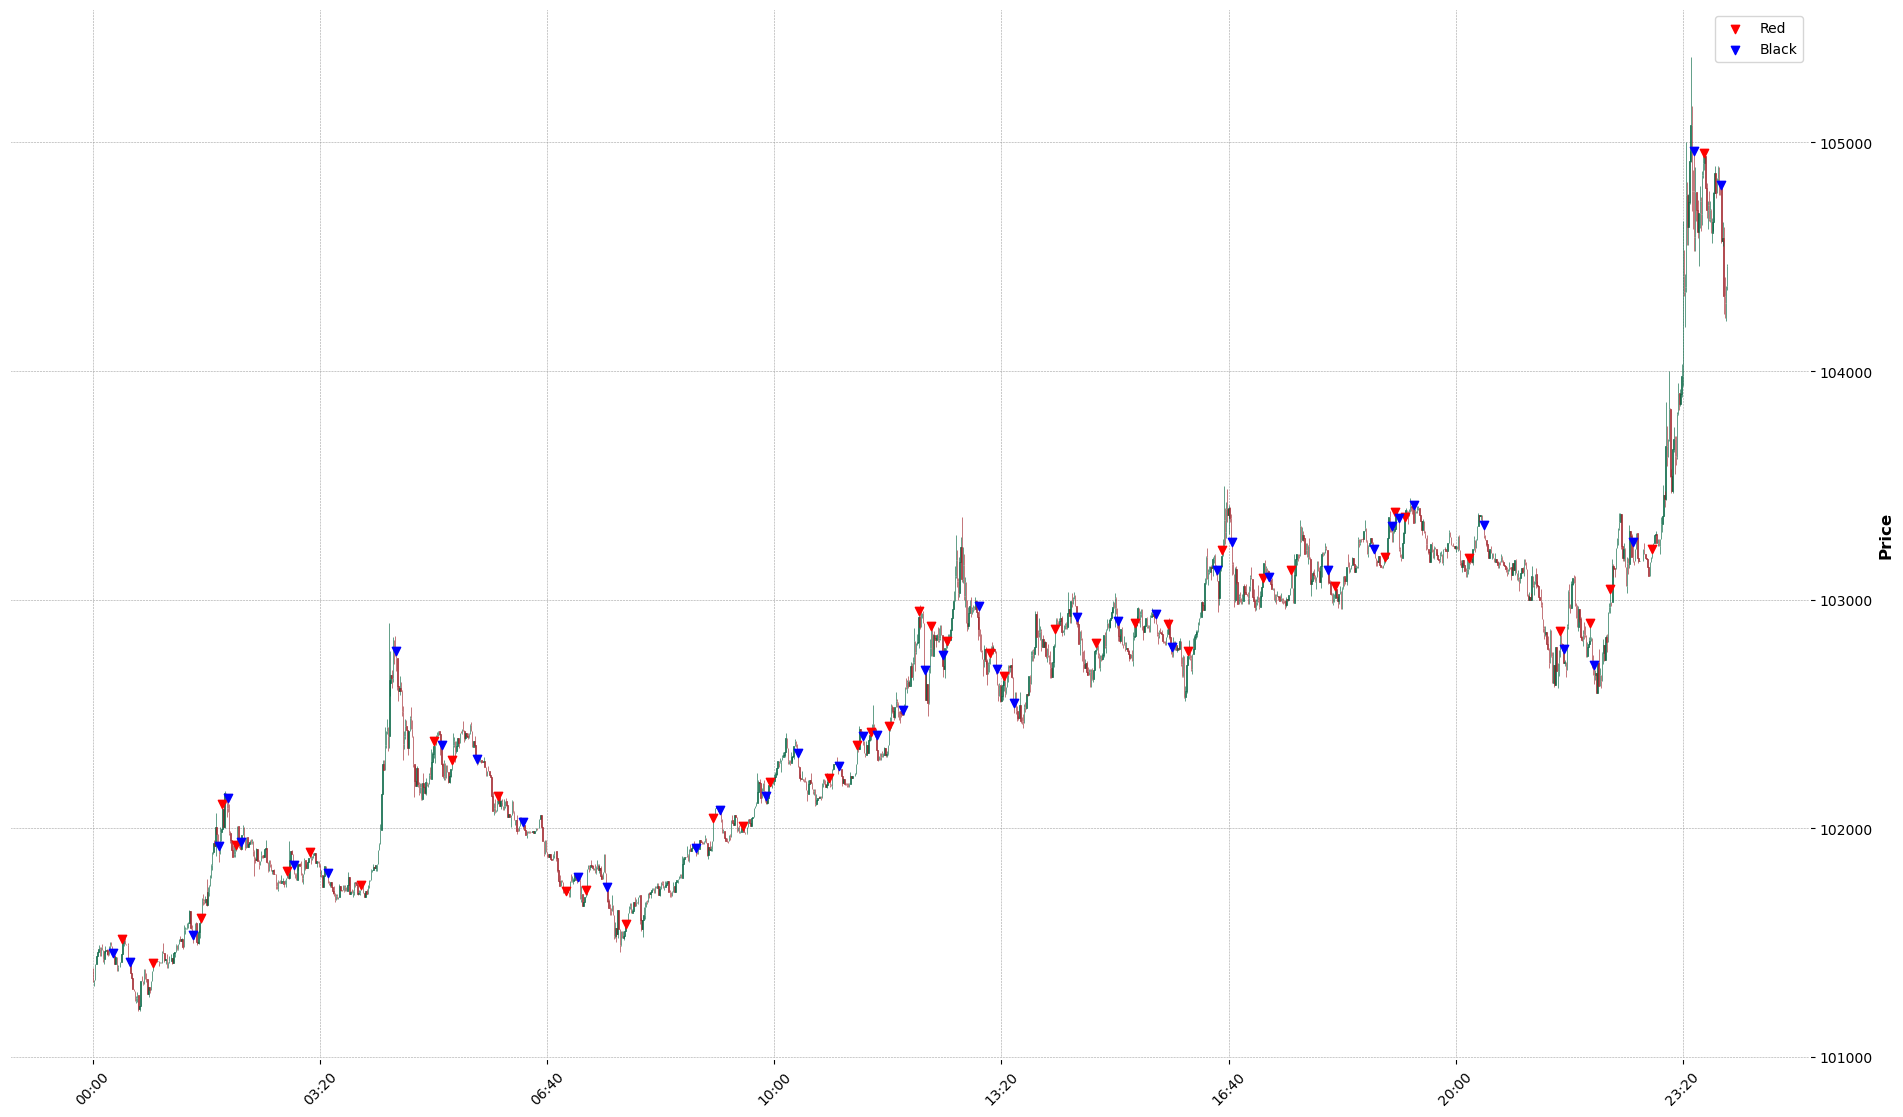

2024-12-16 00:00:00 238.1777612719111


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


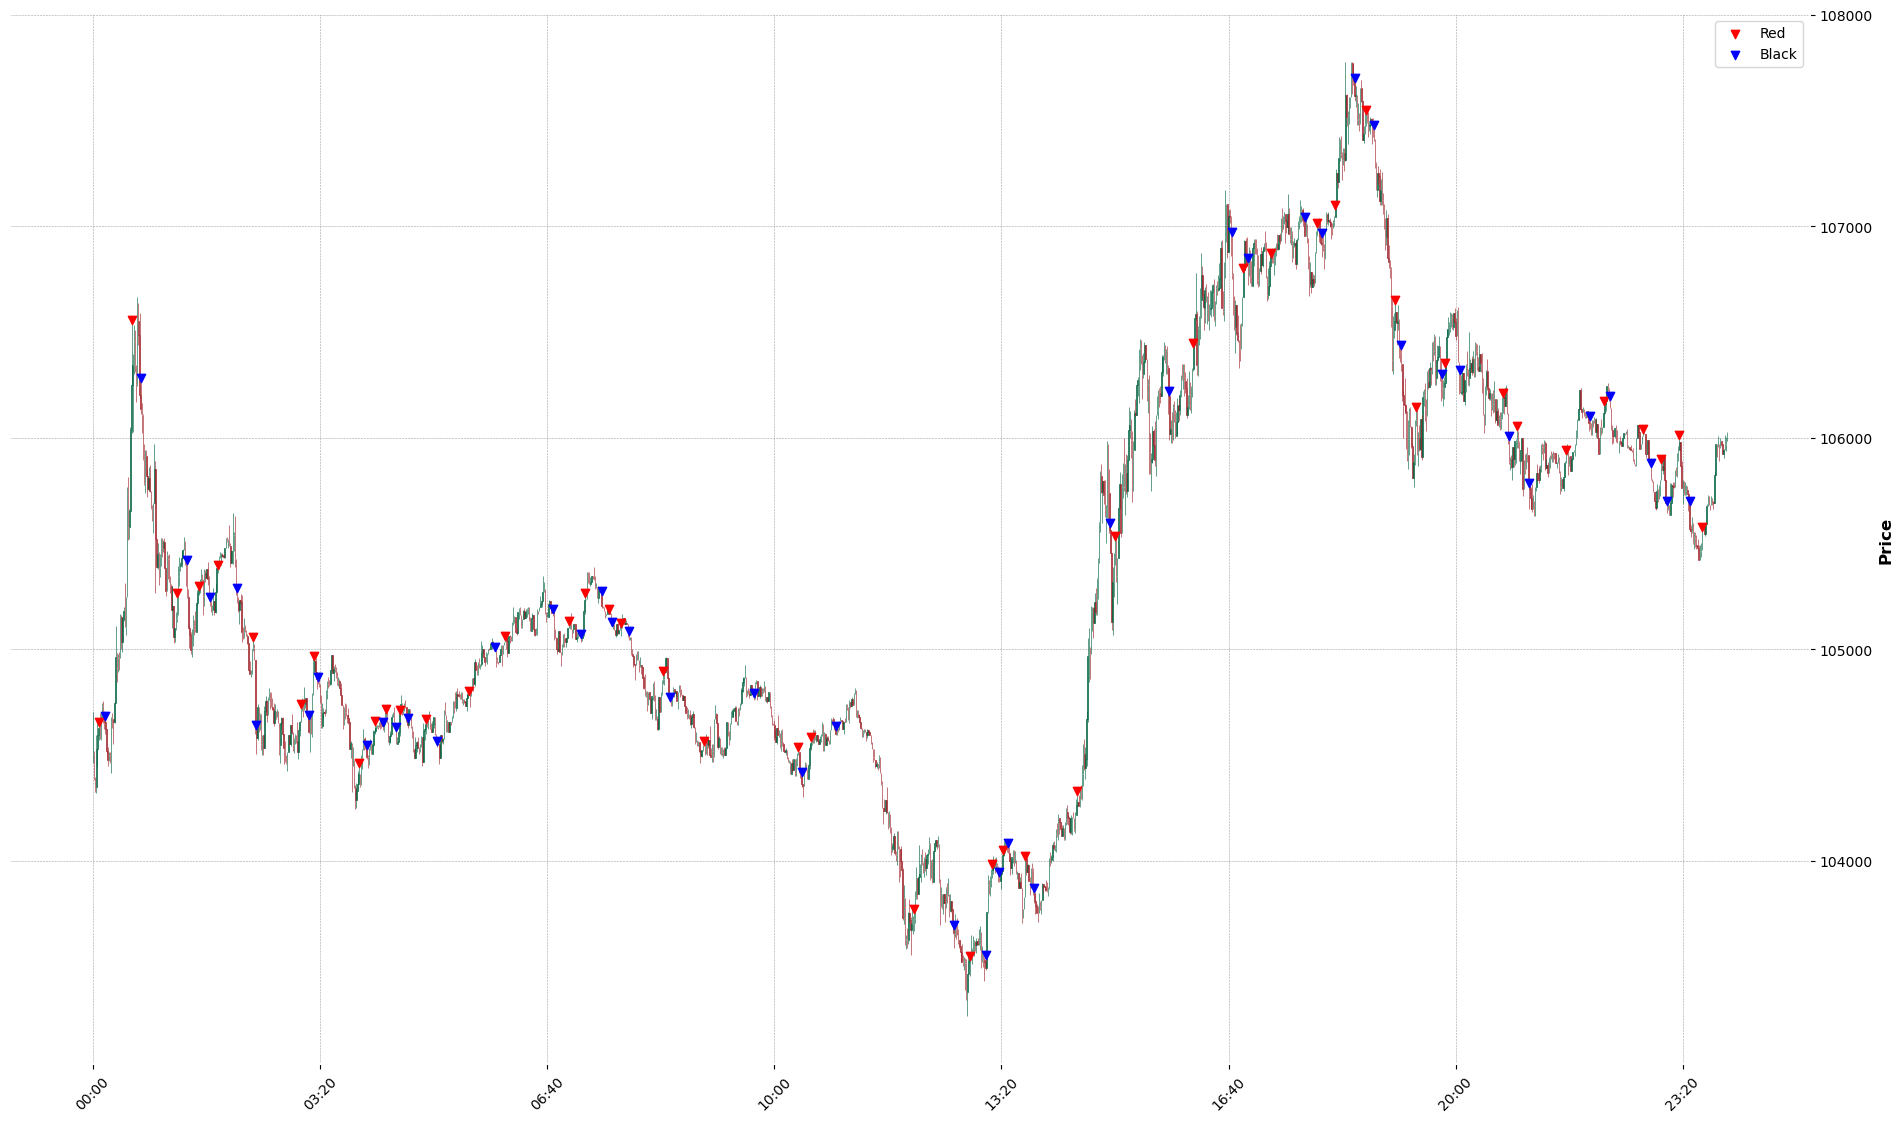

2024-12-17 00:00:00 249.96430907295505


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


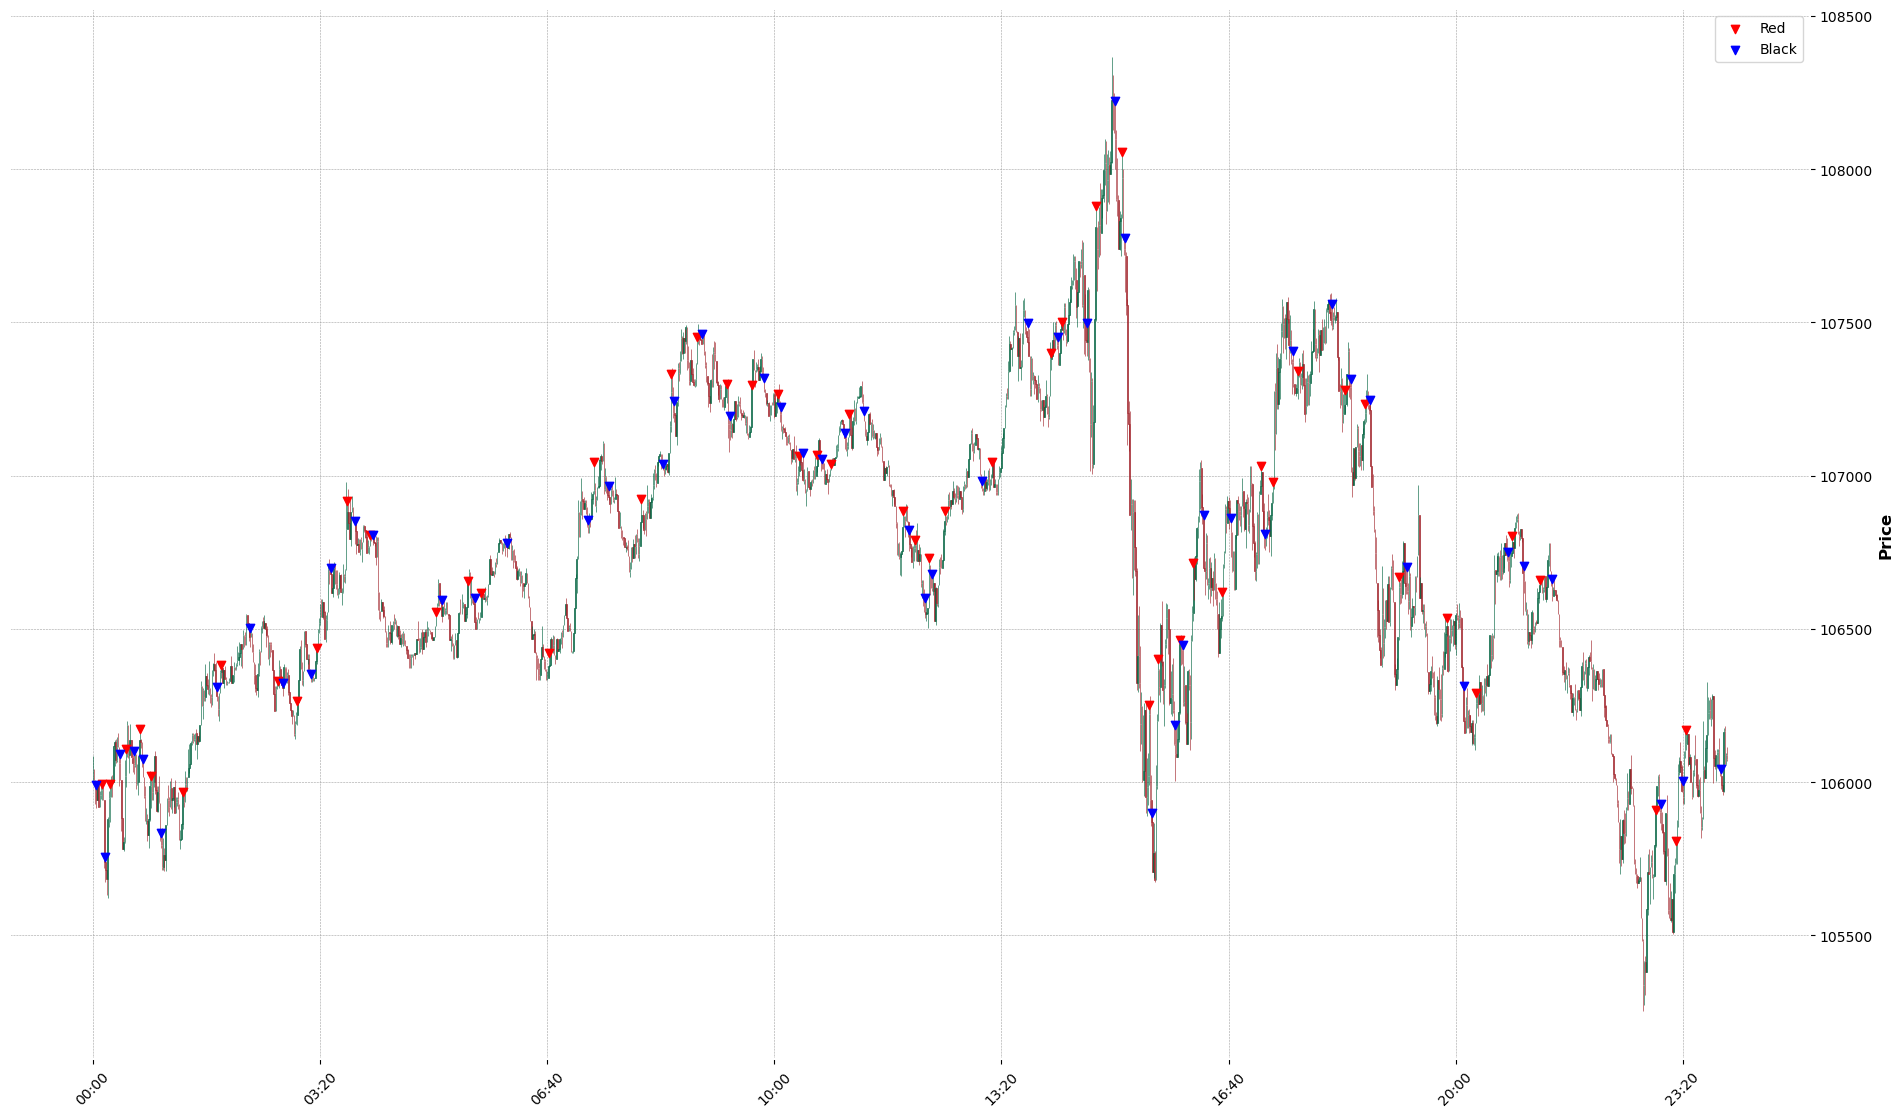

2024-12-18 00:00:00 261.009298649752


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


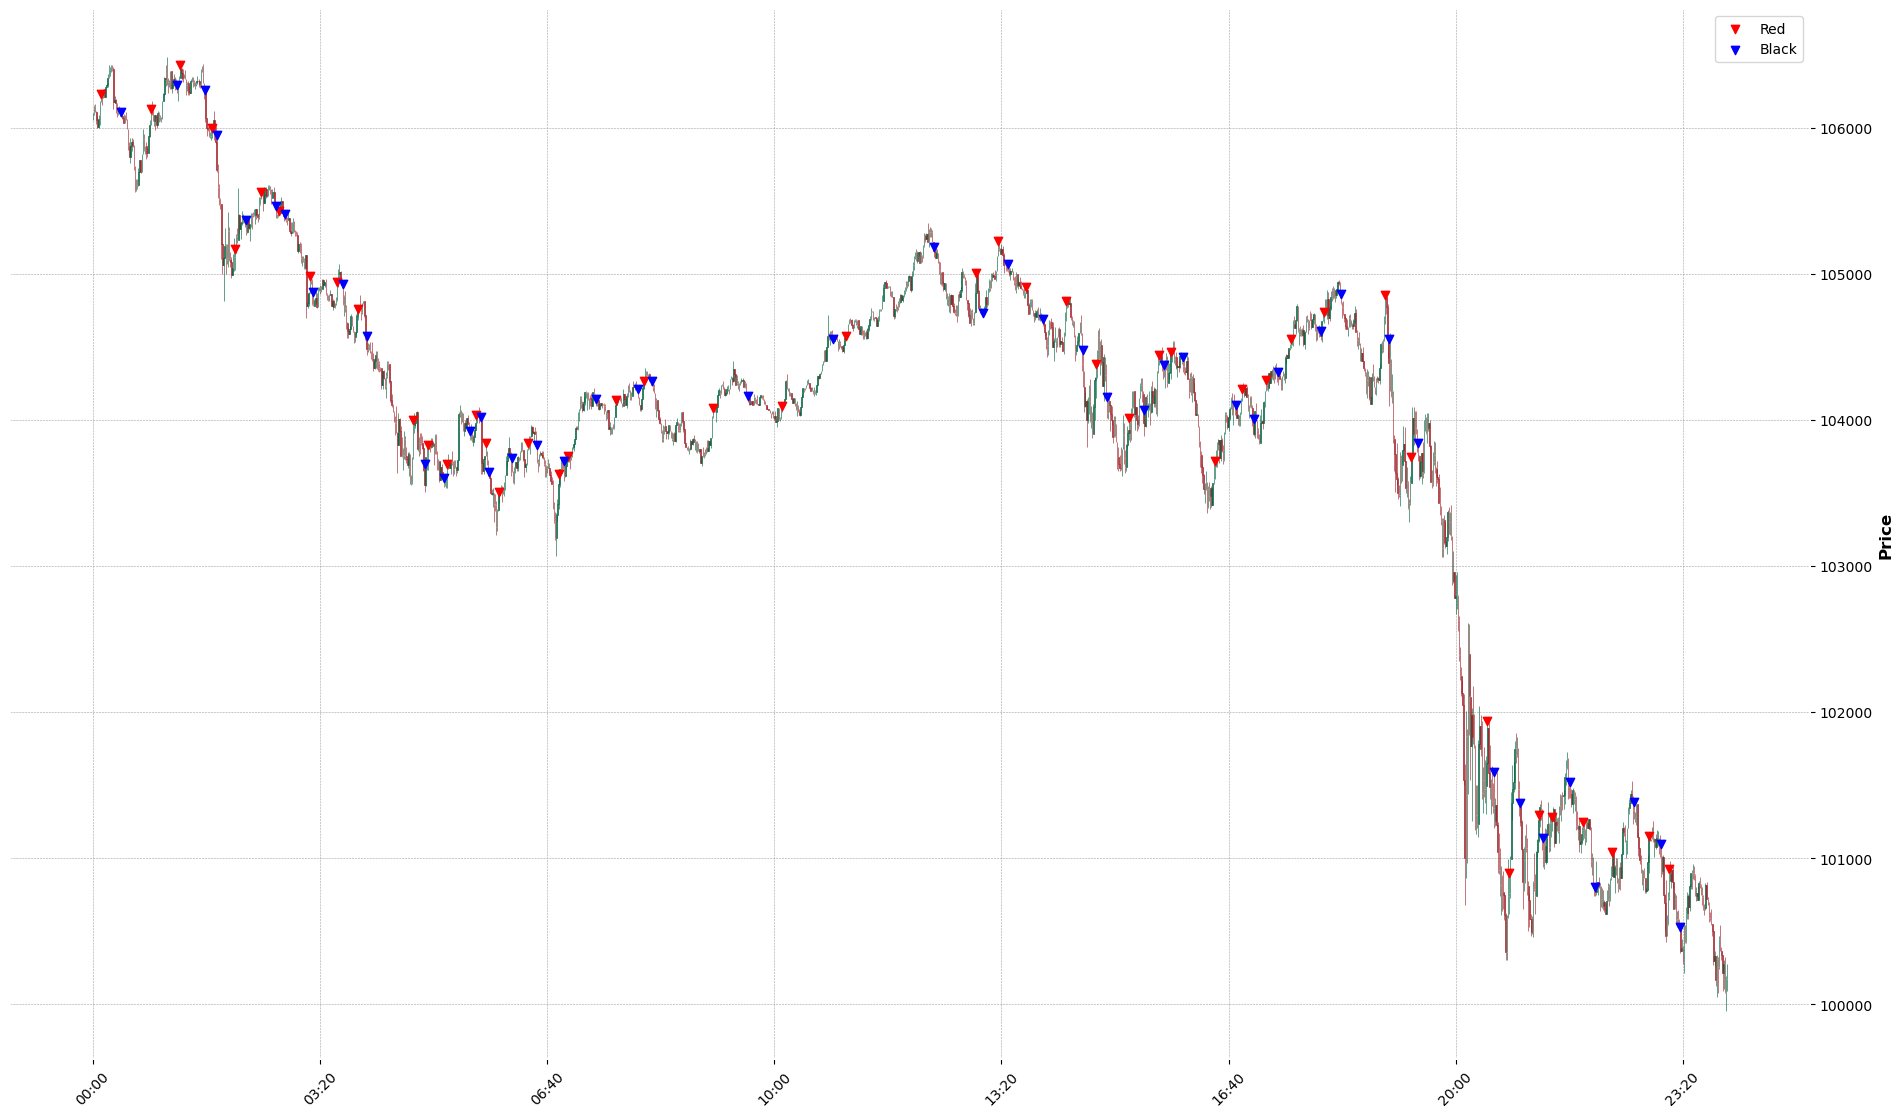

2024-12-19 00:00:00 296.3007543821519


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


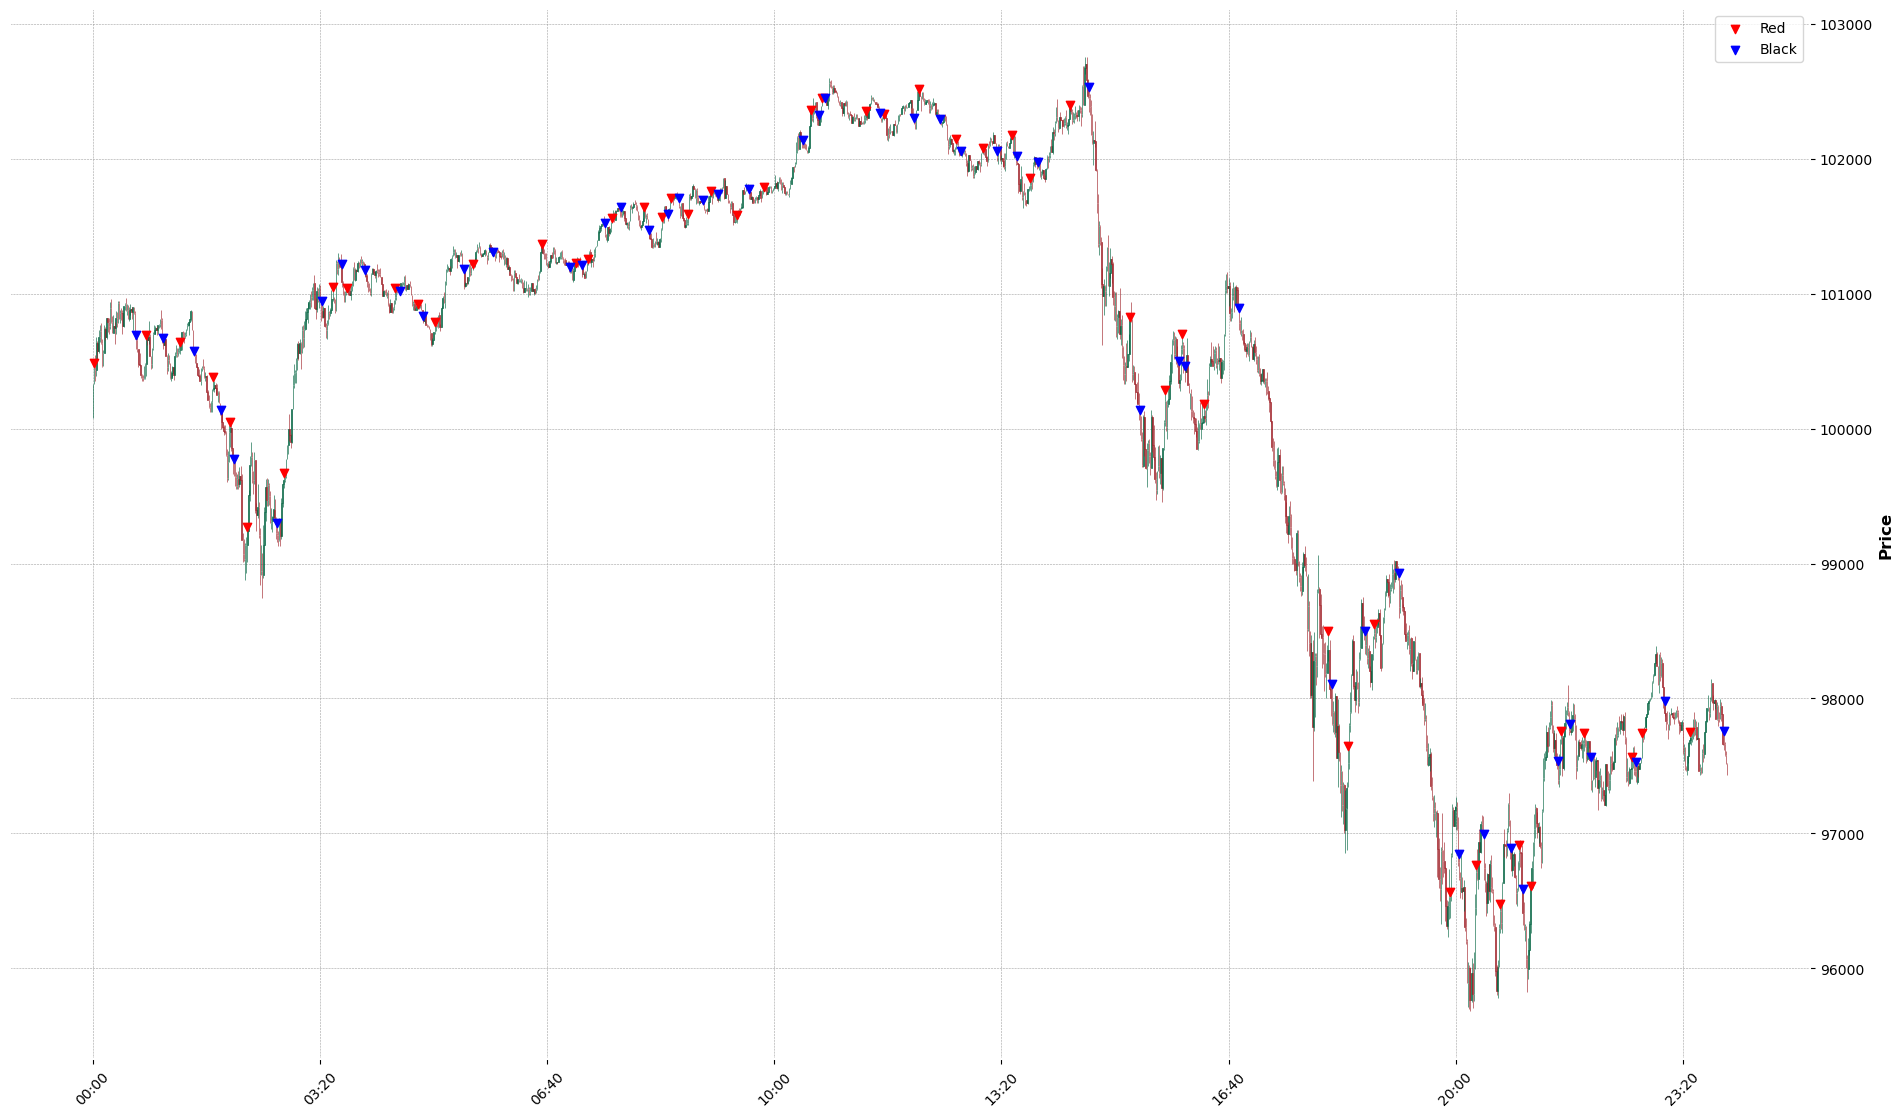

2024-12-20 00:00:00 336.33333189415305


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


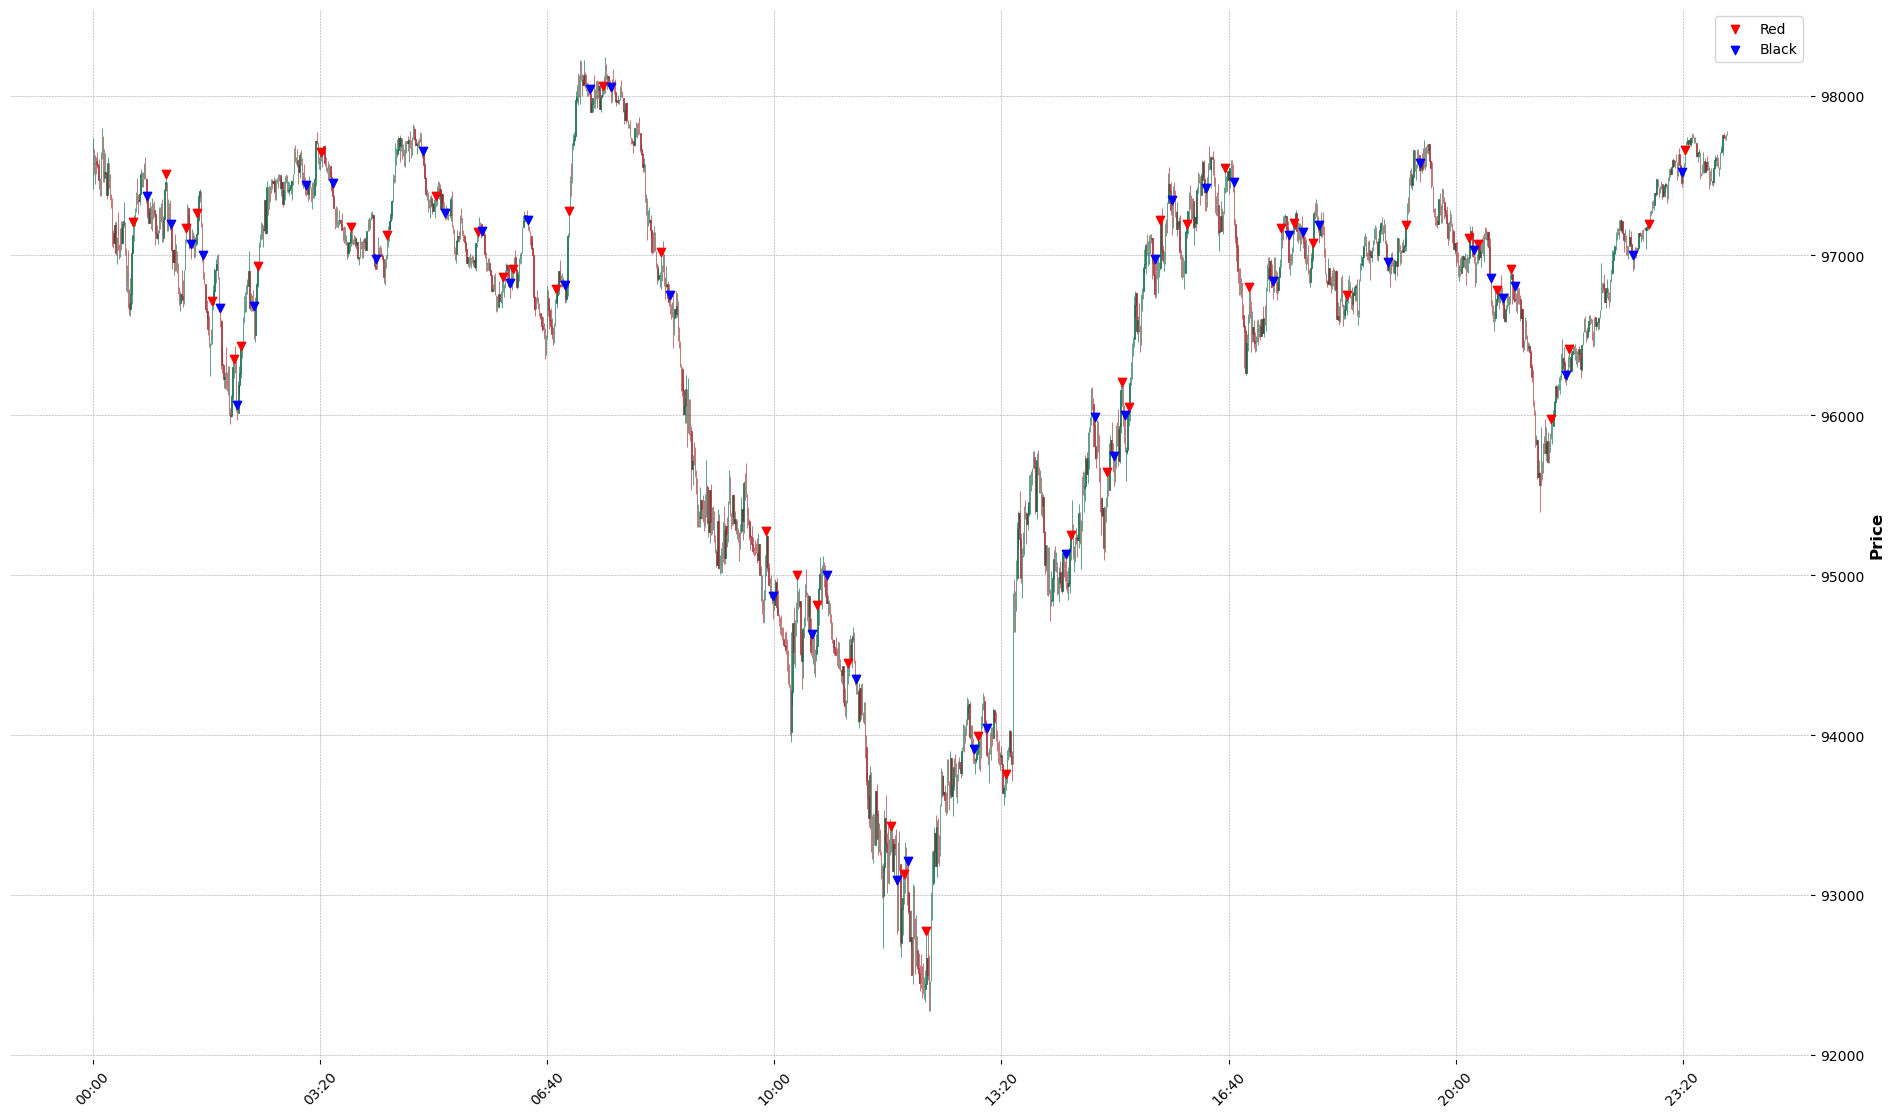

2024-12-21 00:00:00 353.9991690844397


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


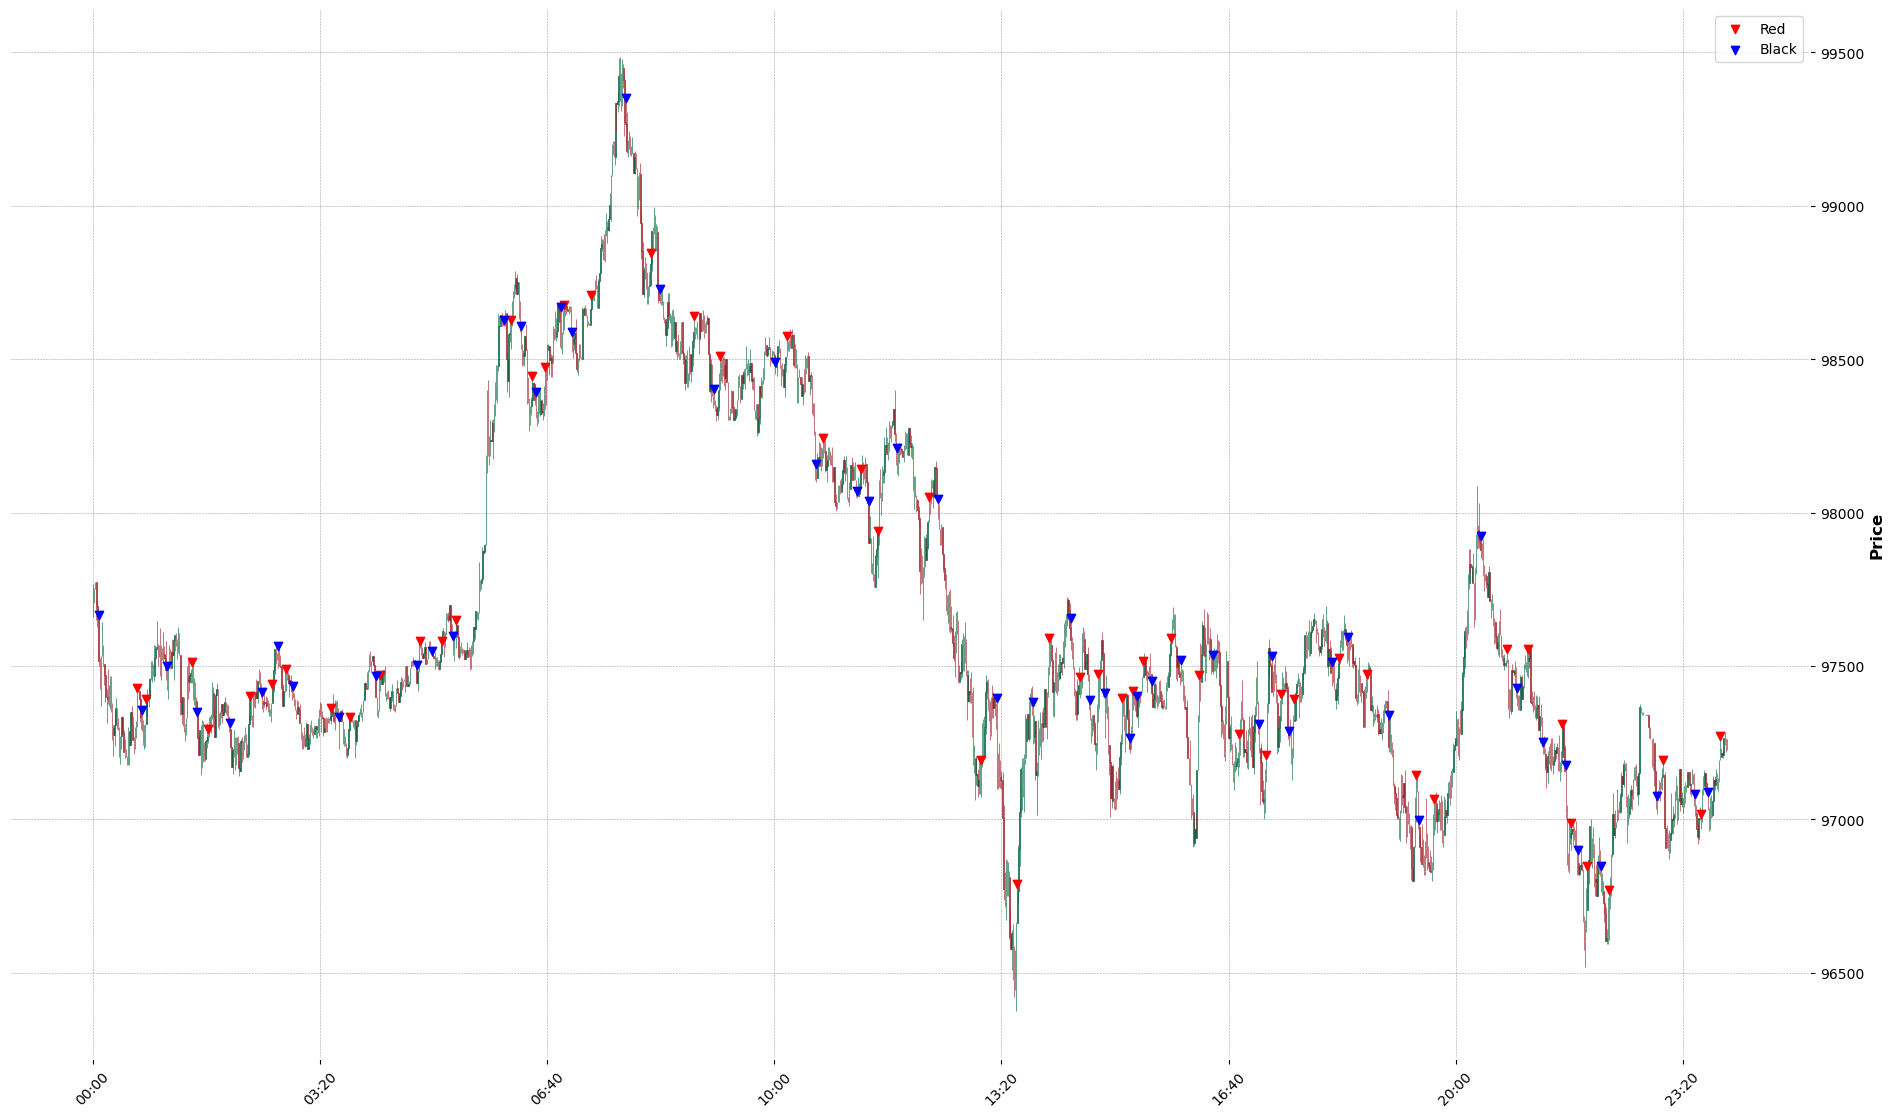

2024-12-22 00:00:00 373.29105425184116


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


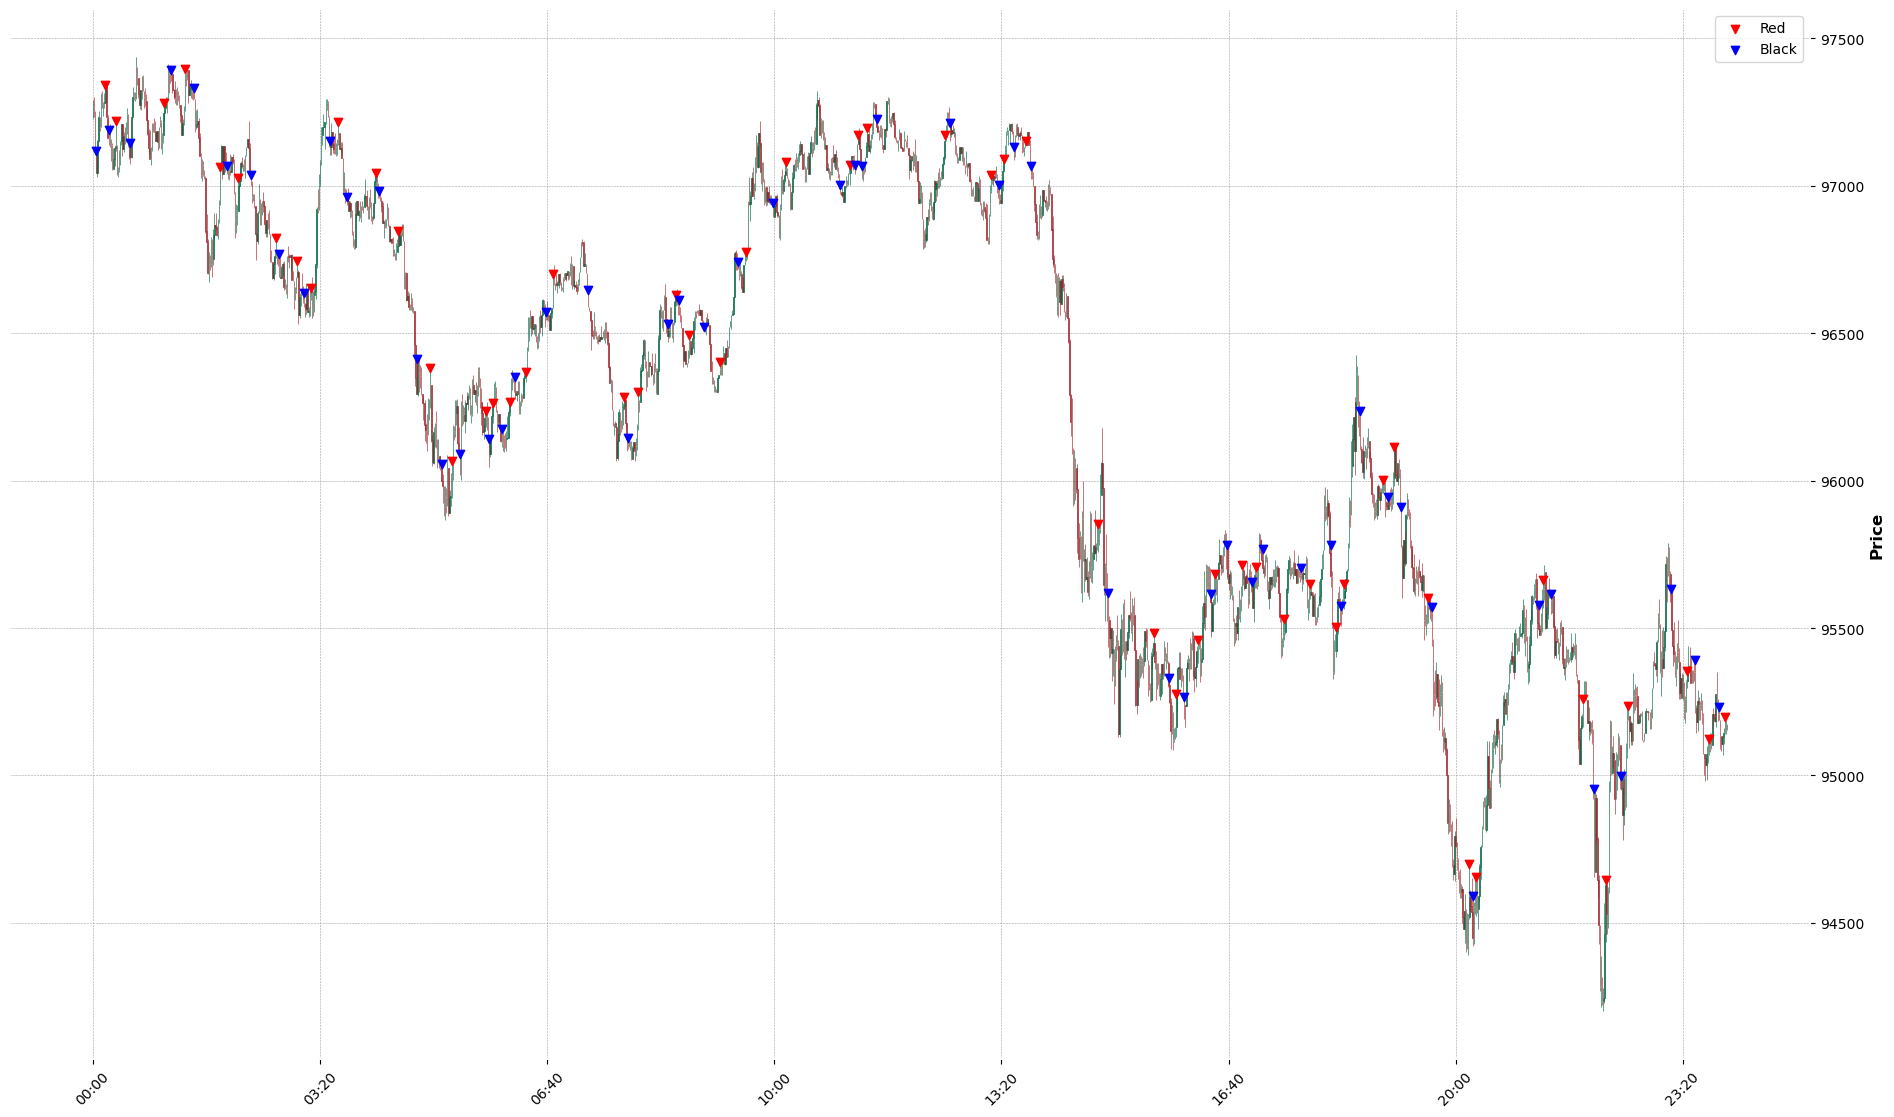

2024-12-23 00:00:00 404.14204798696437


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


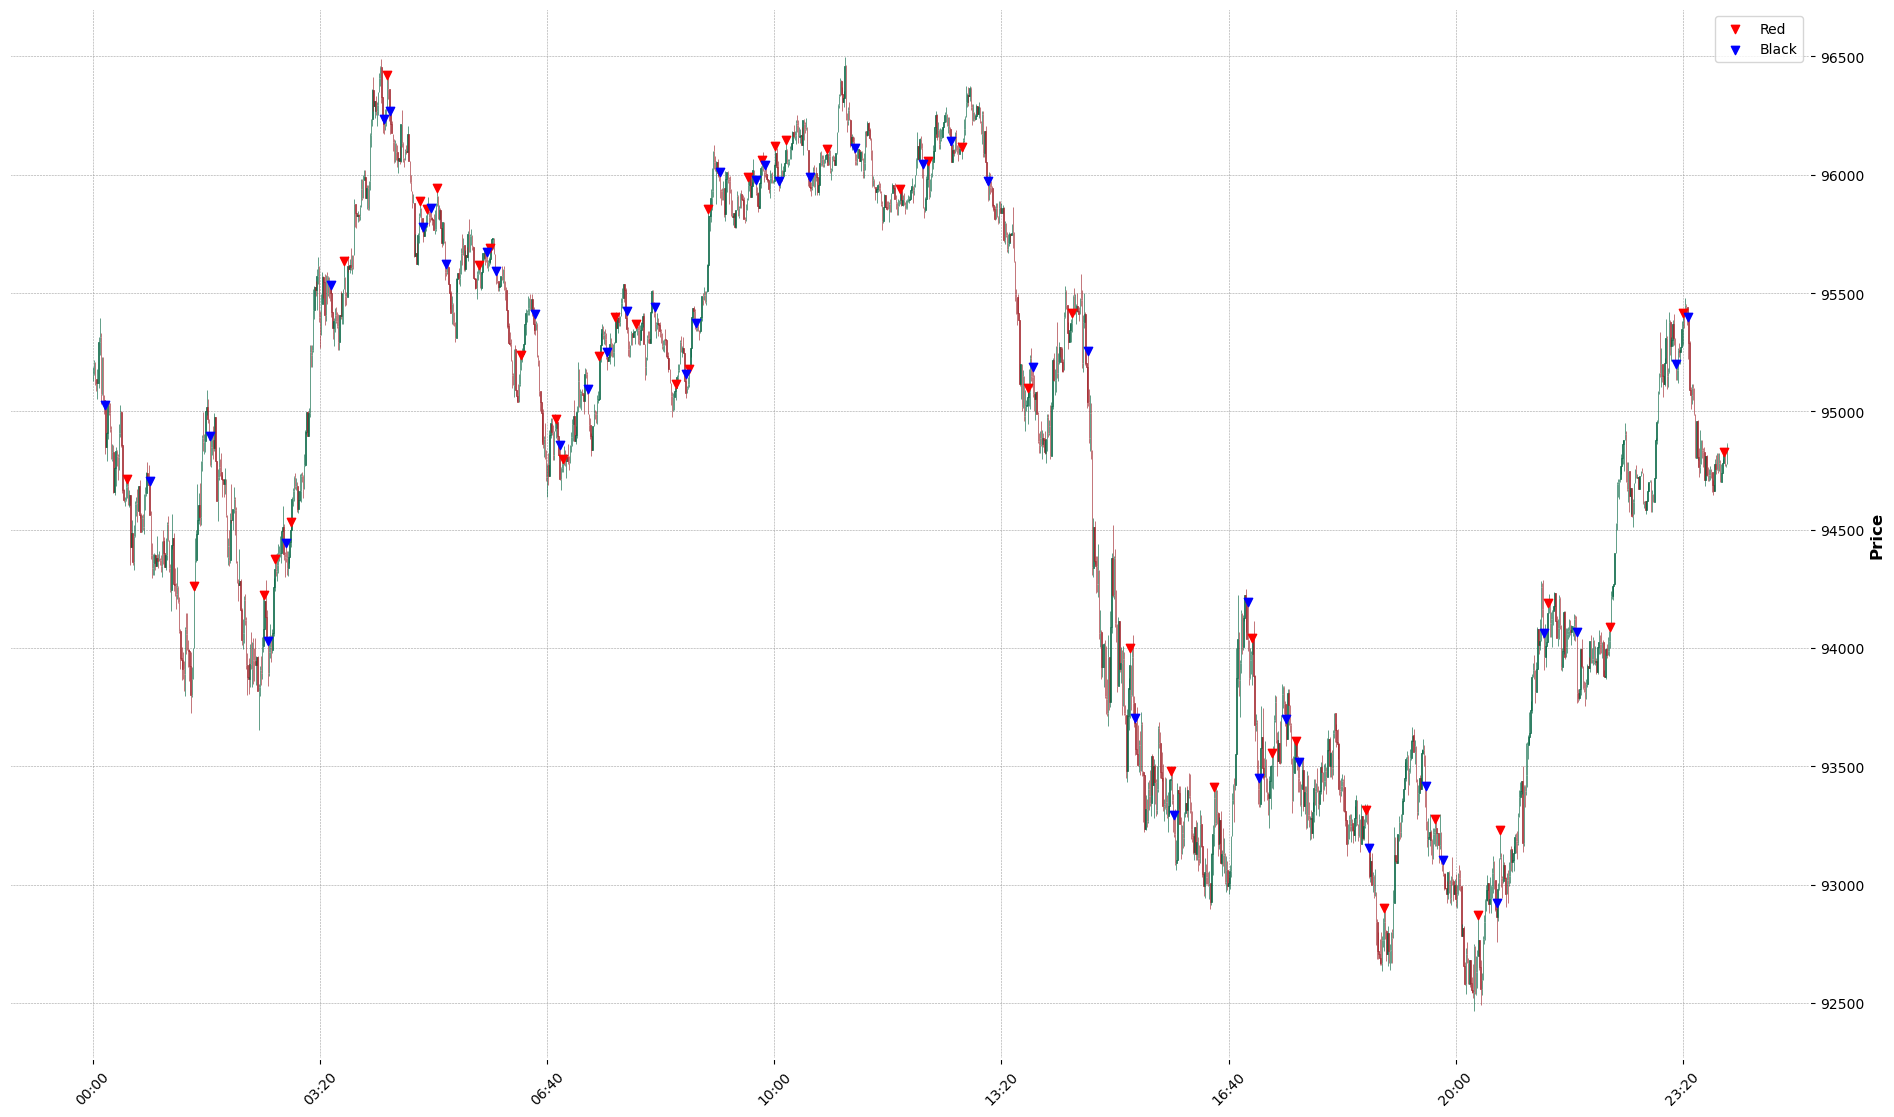

2024-12-24 00:00:00 431.2690143702085


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


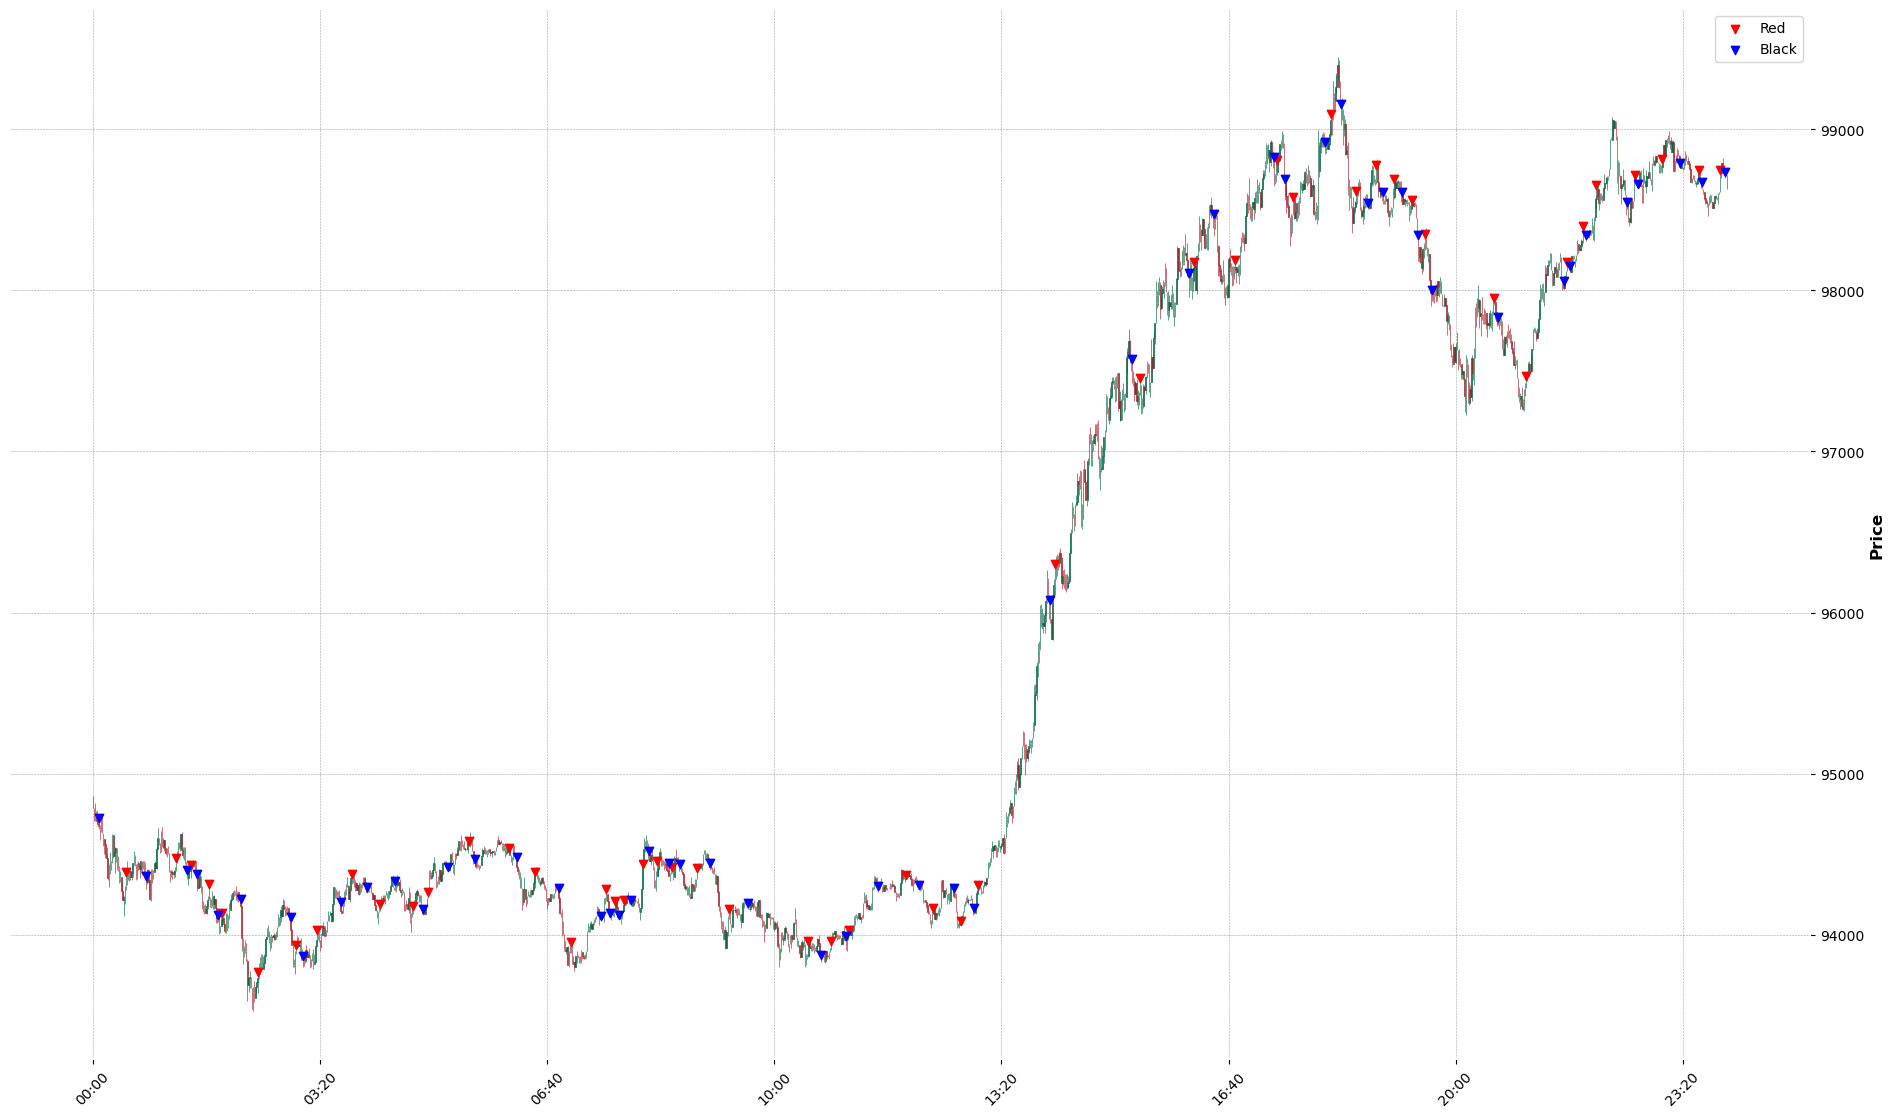

2024-12-25 00:00:00 460.9162319774877


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


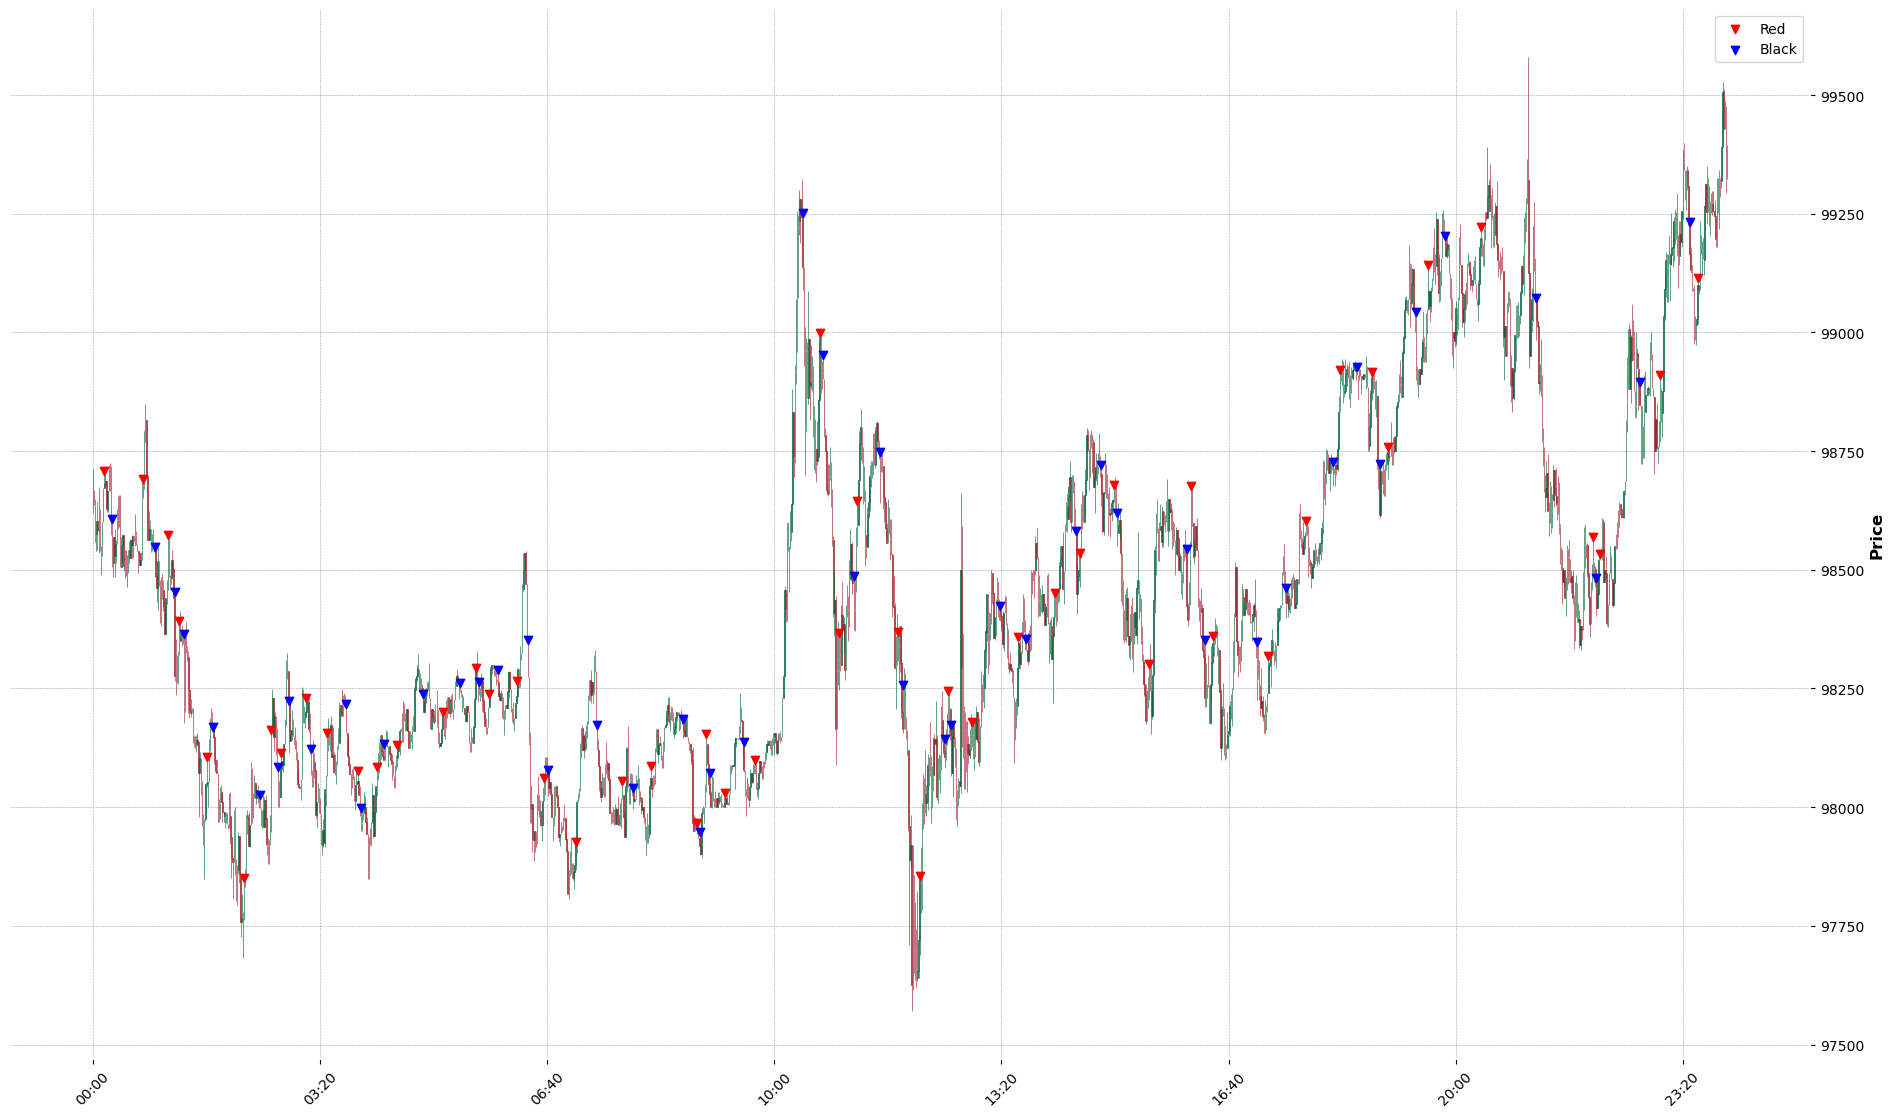

2024-12-26 00:00:00 487.389815354894


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


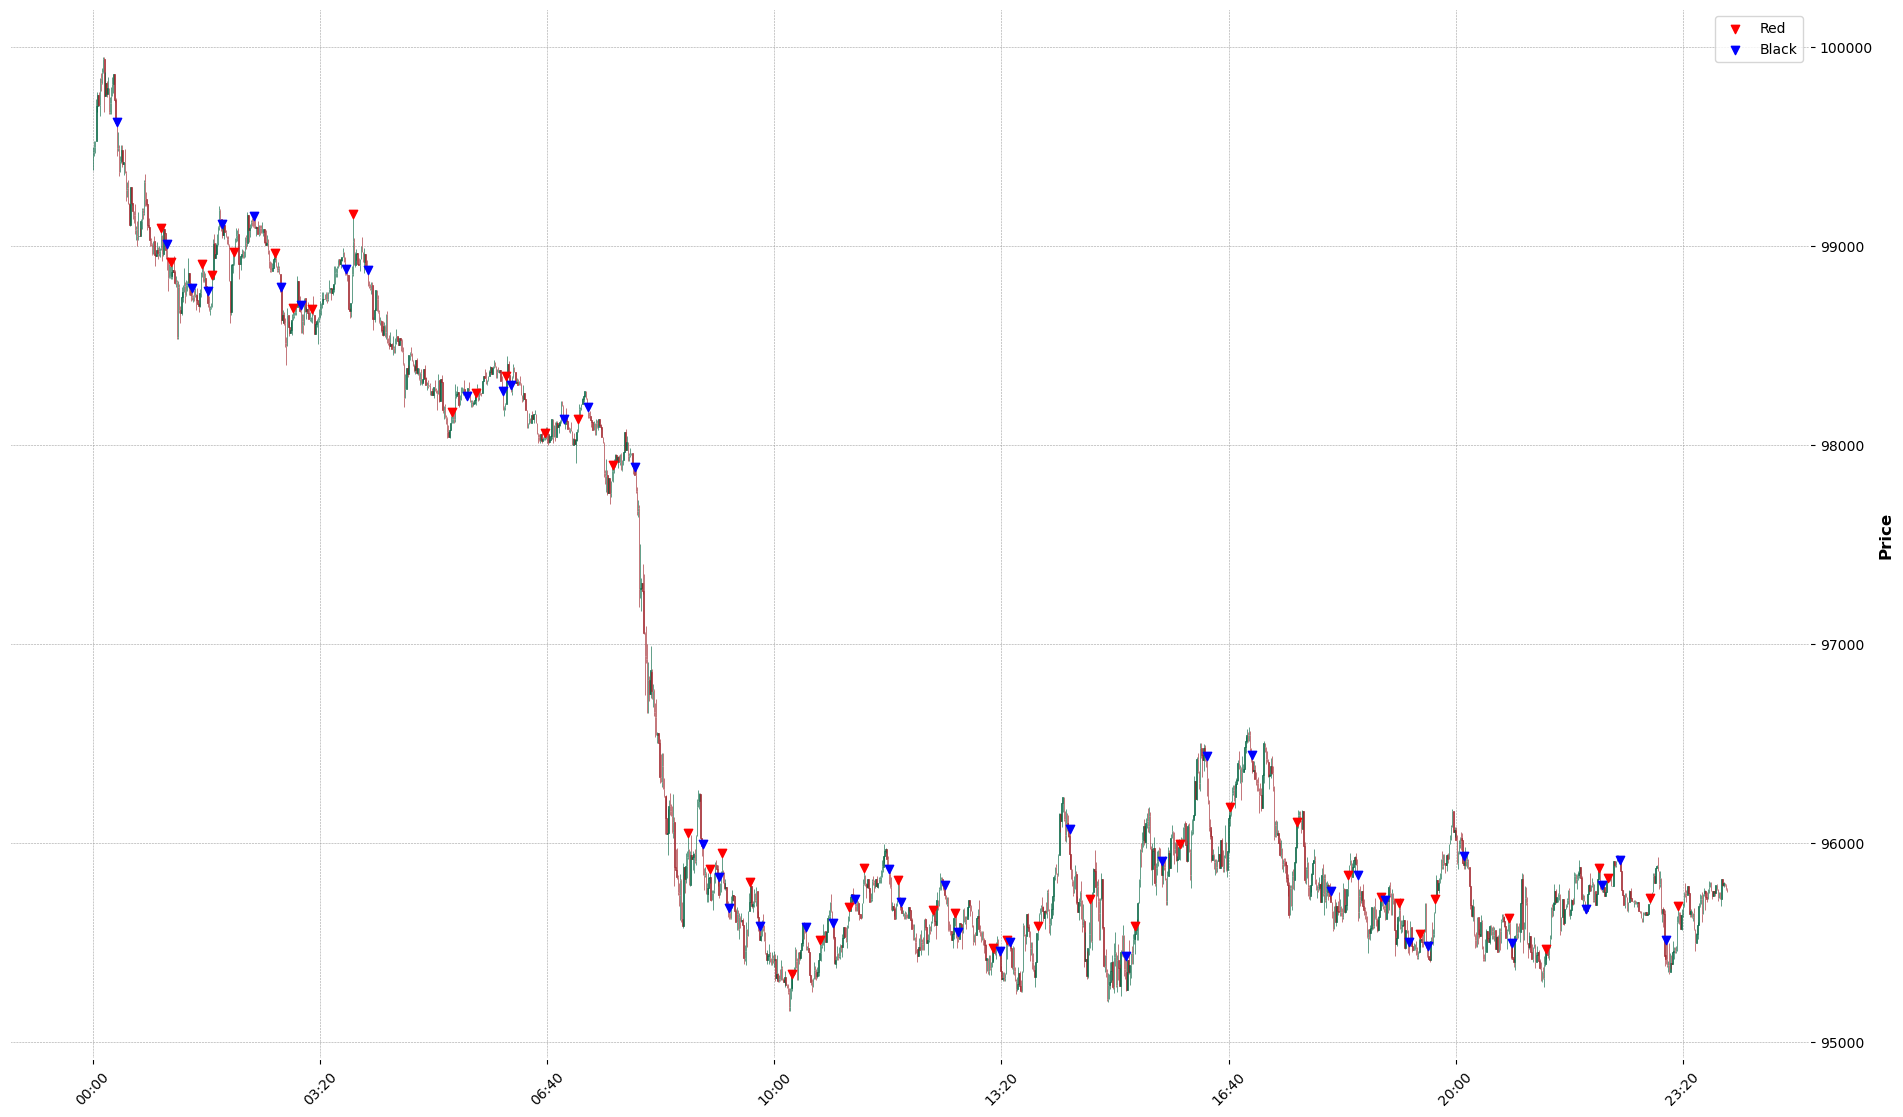

2024-12-27 00:00:00 512.9367021642817


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


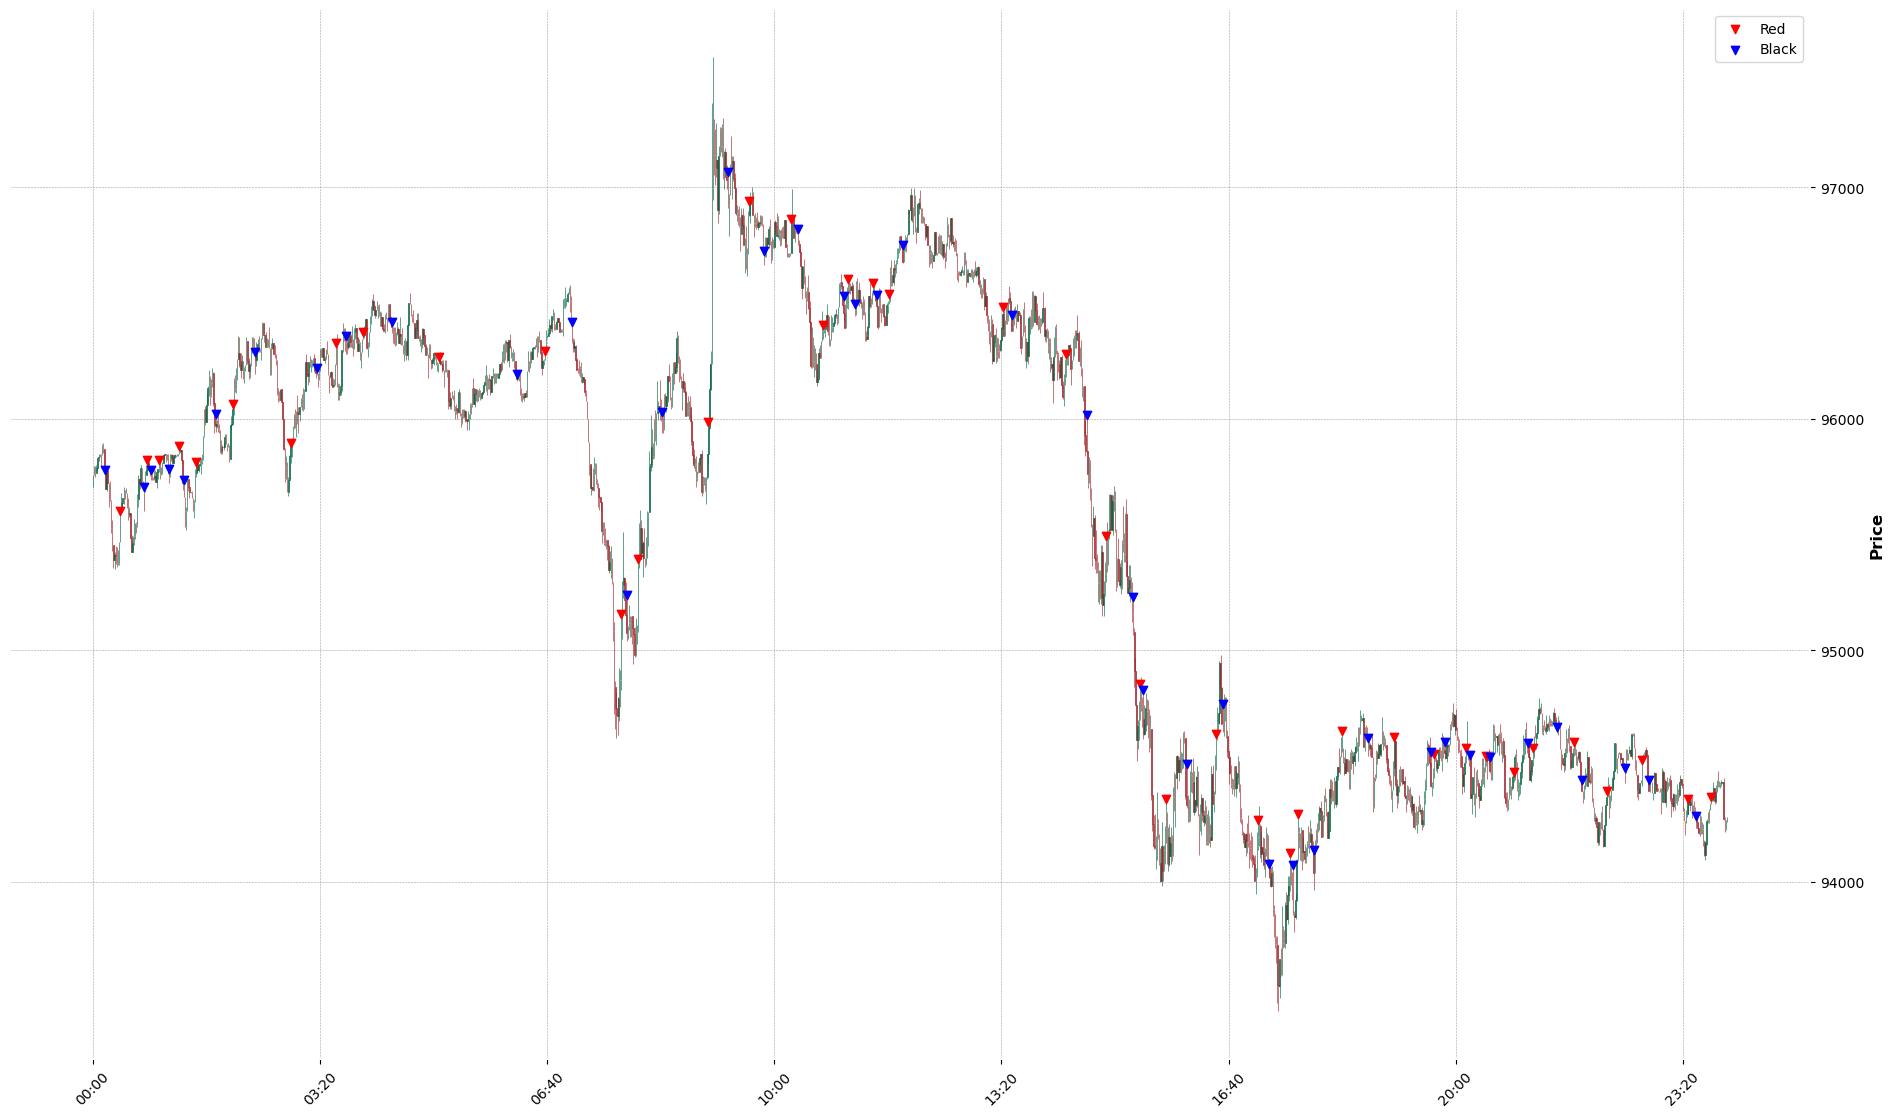

2024-12-28 00:00:00 511.591544030541


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


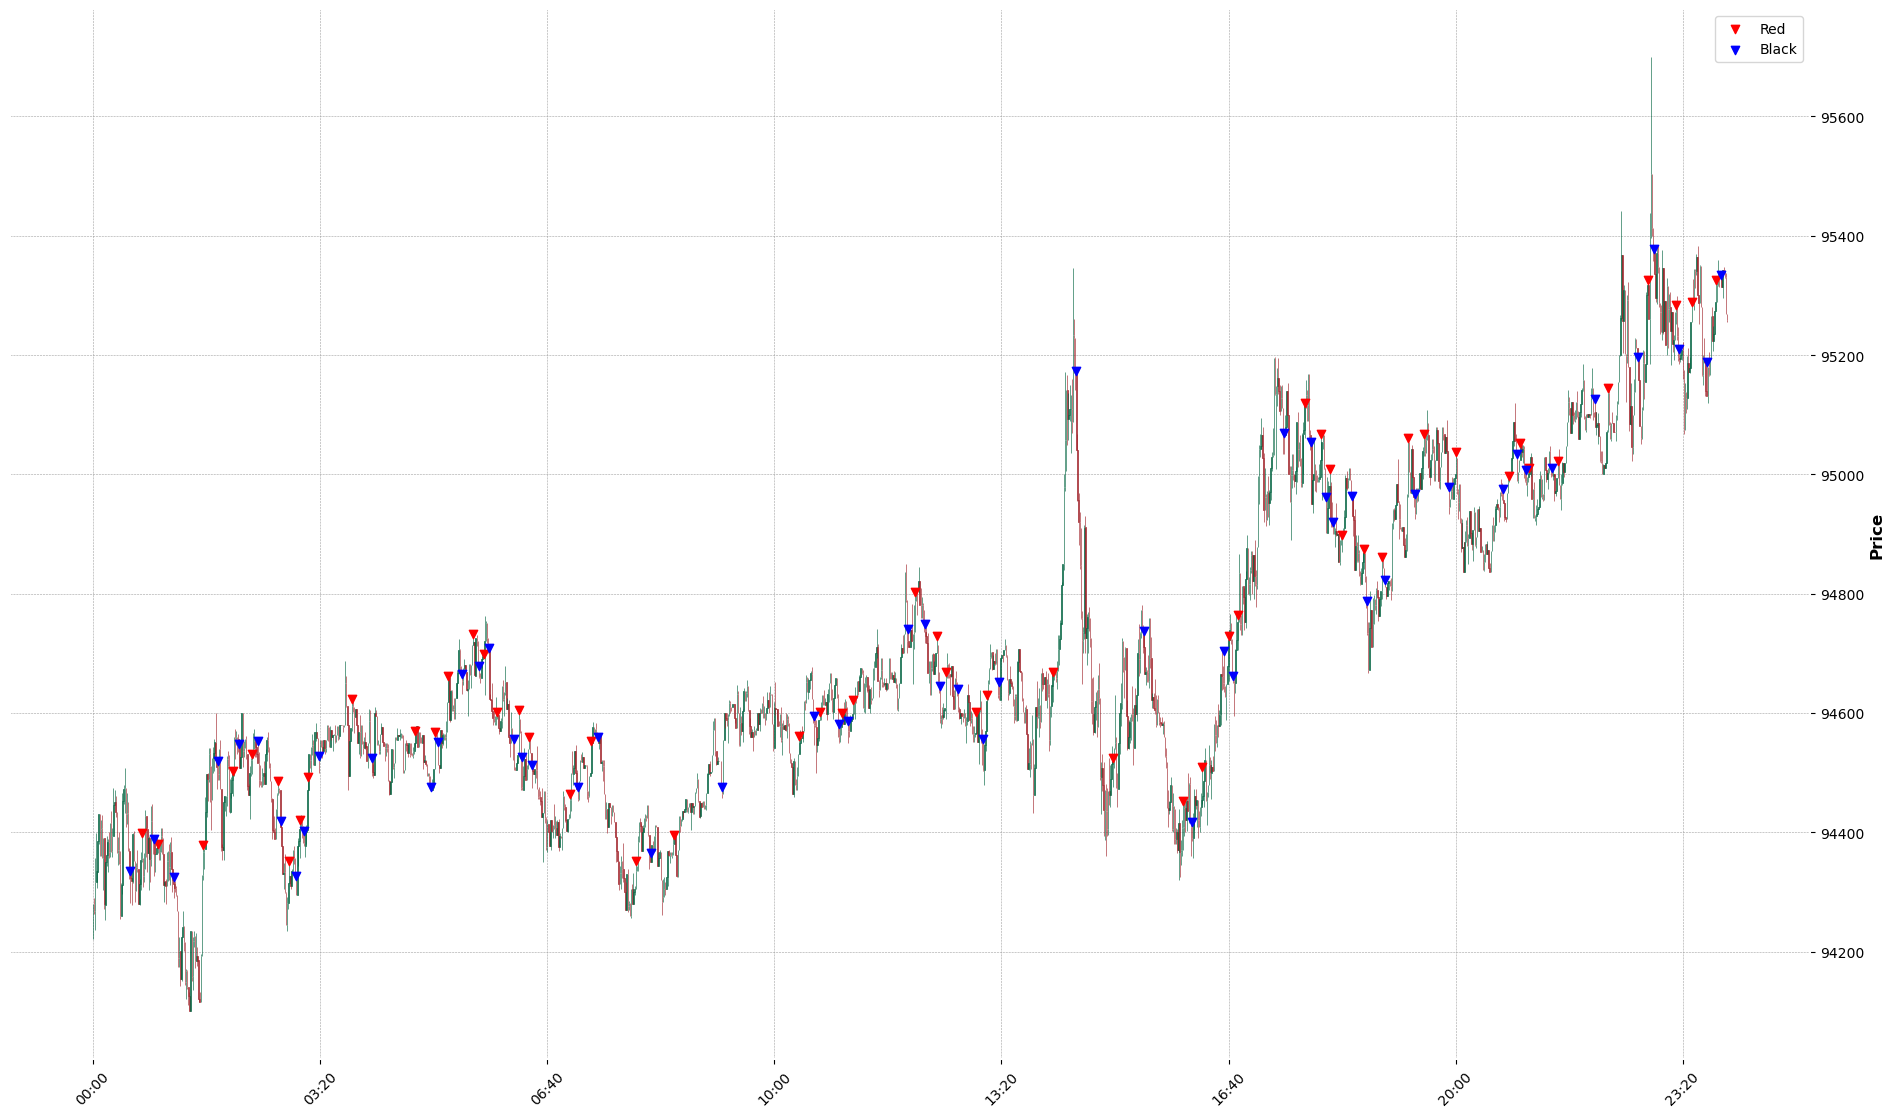

2024-12-29 00:00:00 531.820603207441


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


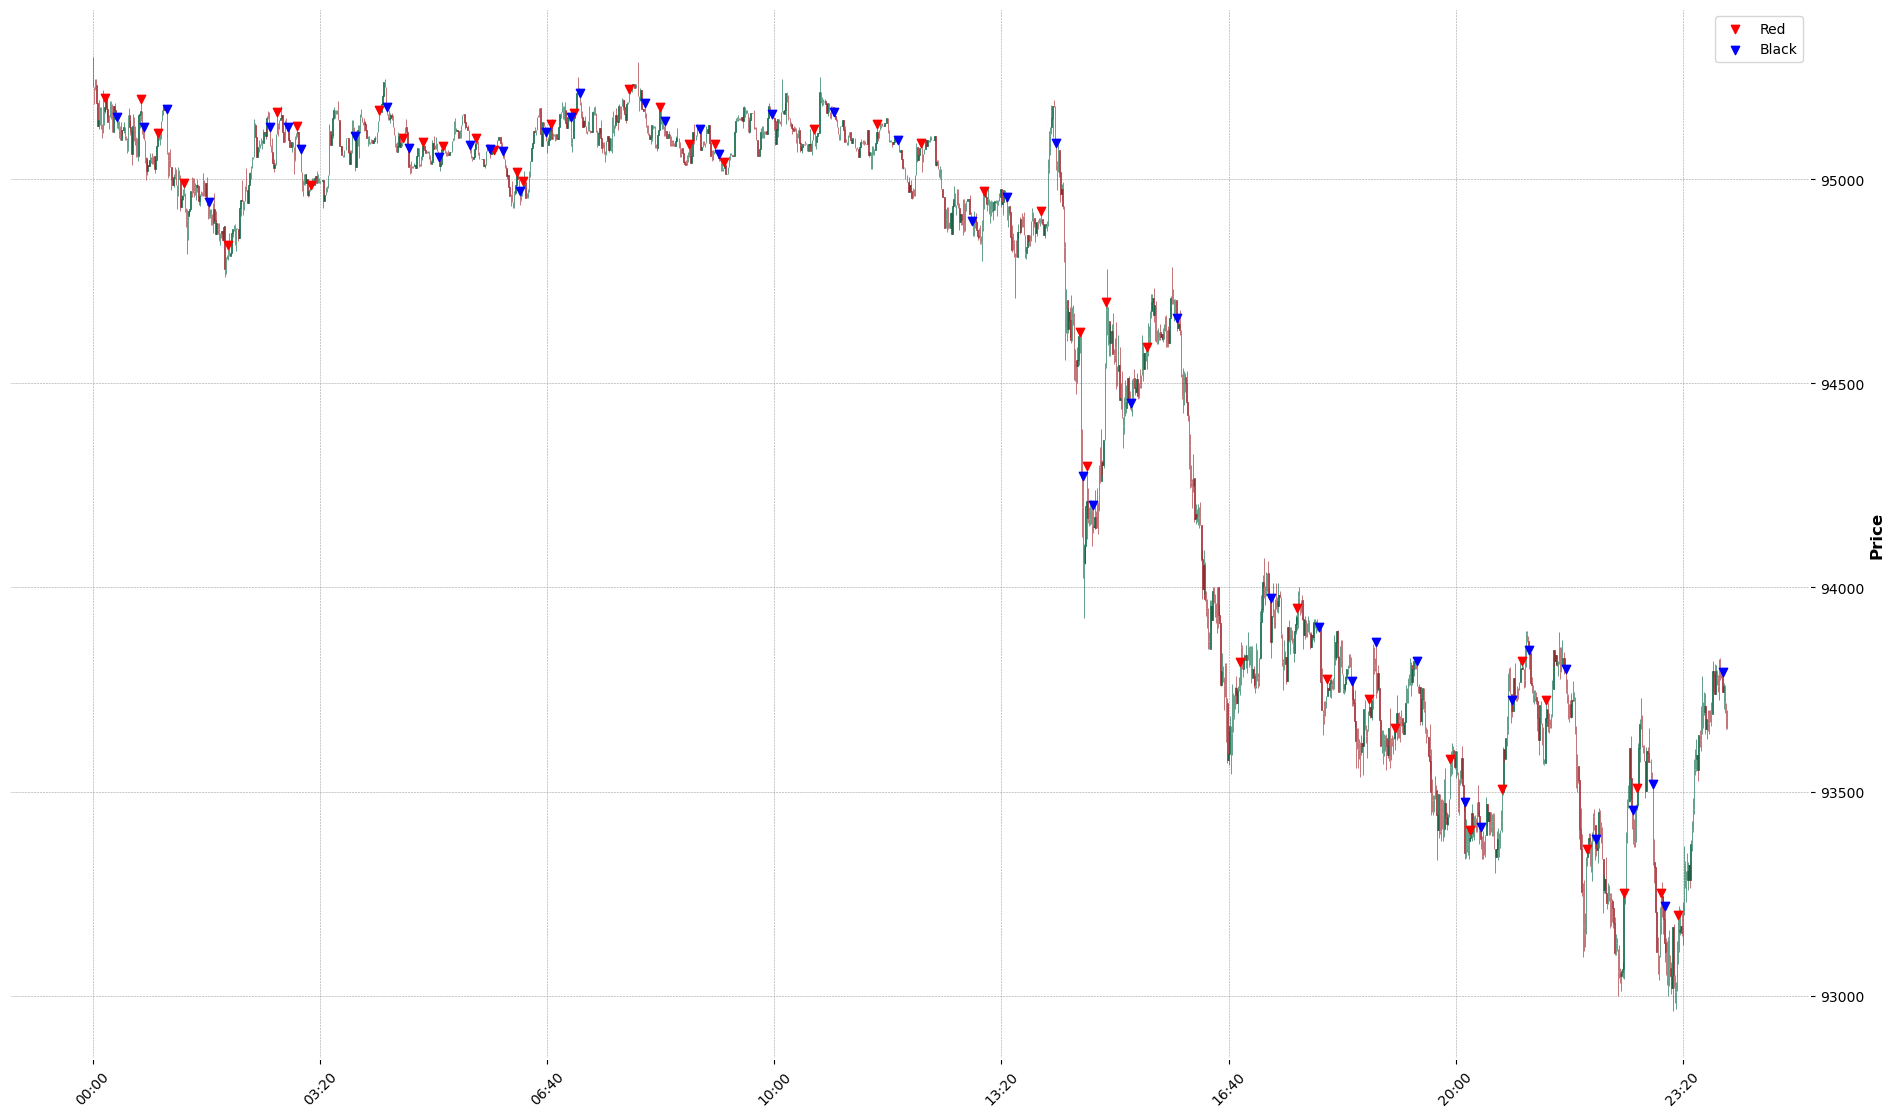

2024-12-30 00:00:00 576.1209426308666


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


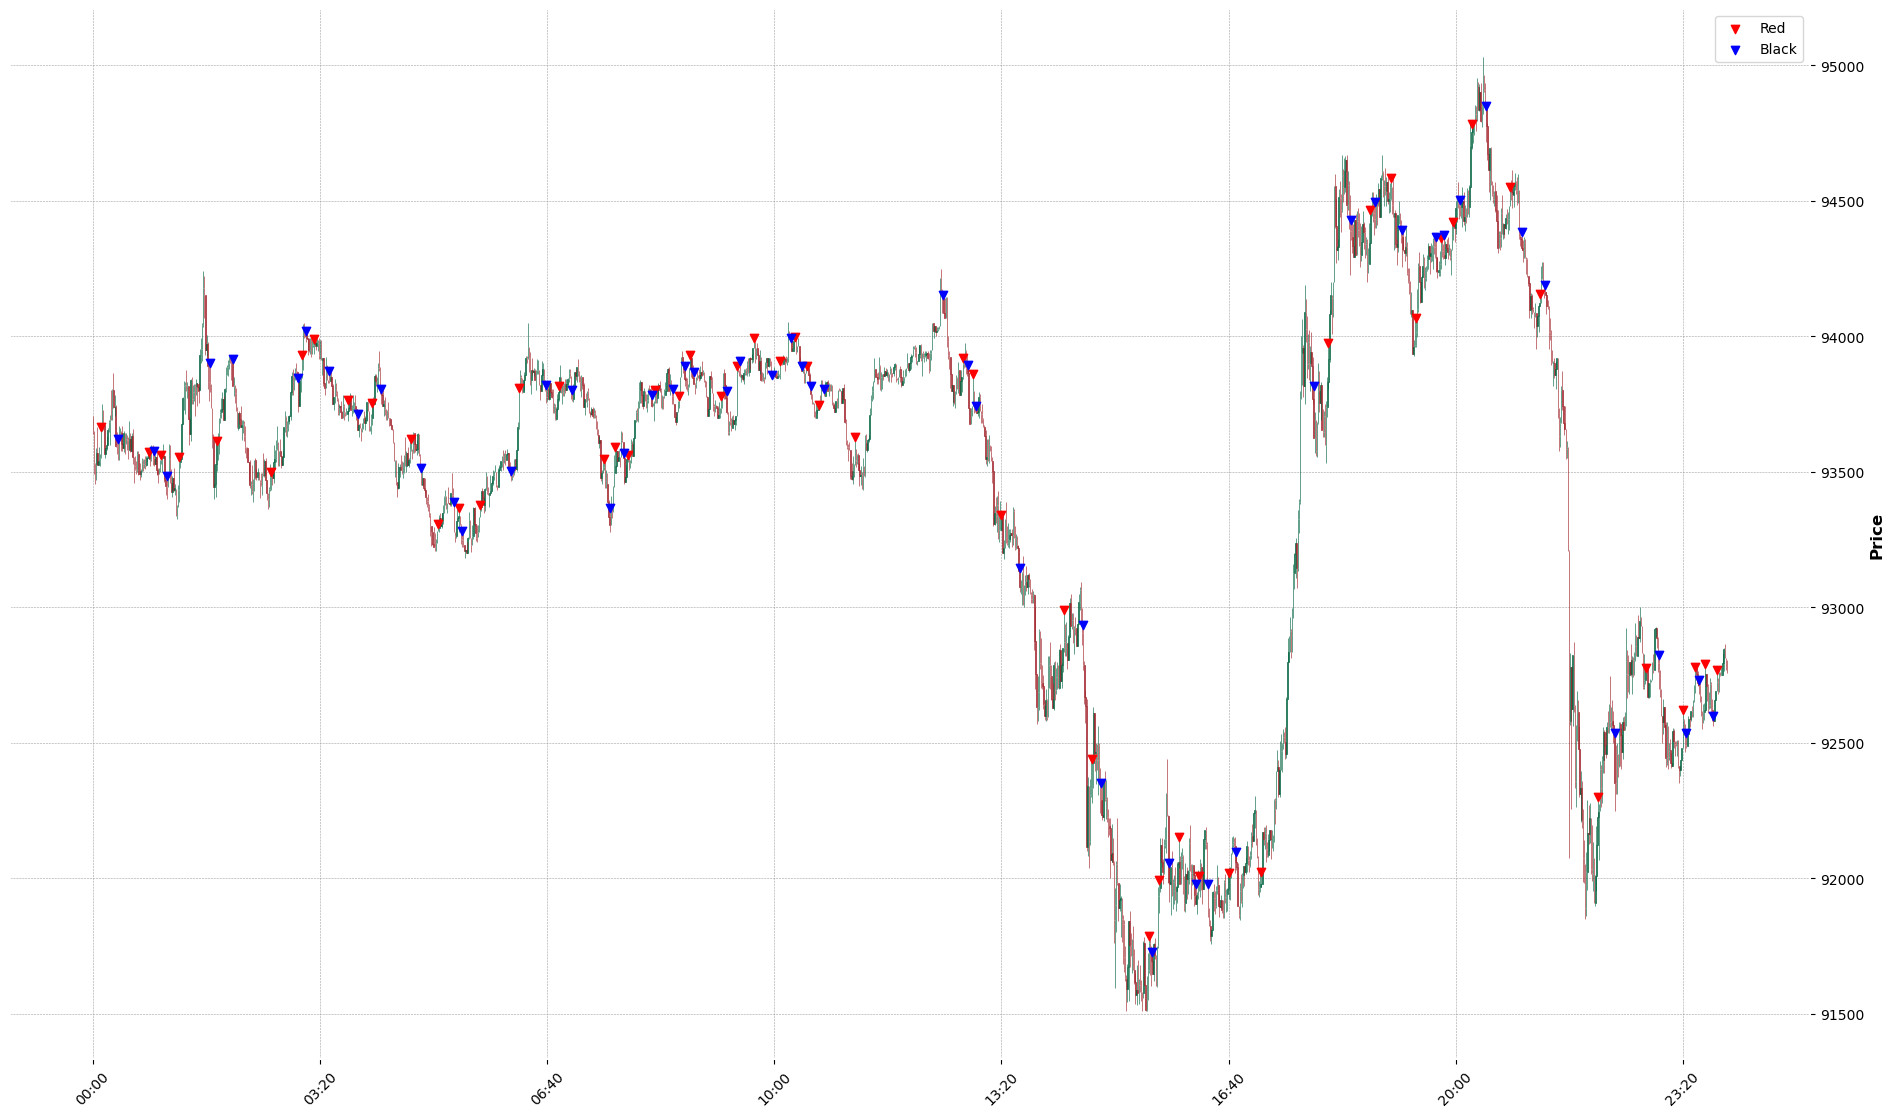

2024-12-31 00:00:00 618.0522483614013


c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19096\2994722861.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['position'] = position_list


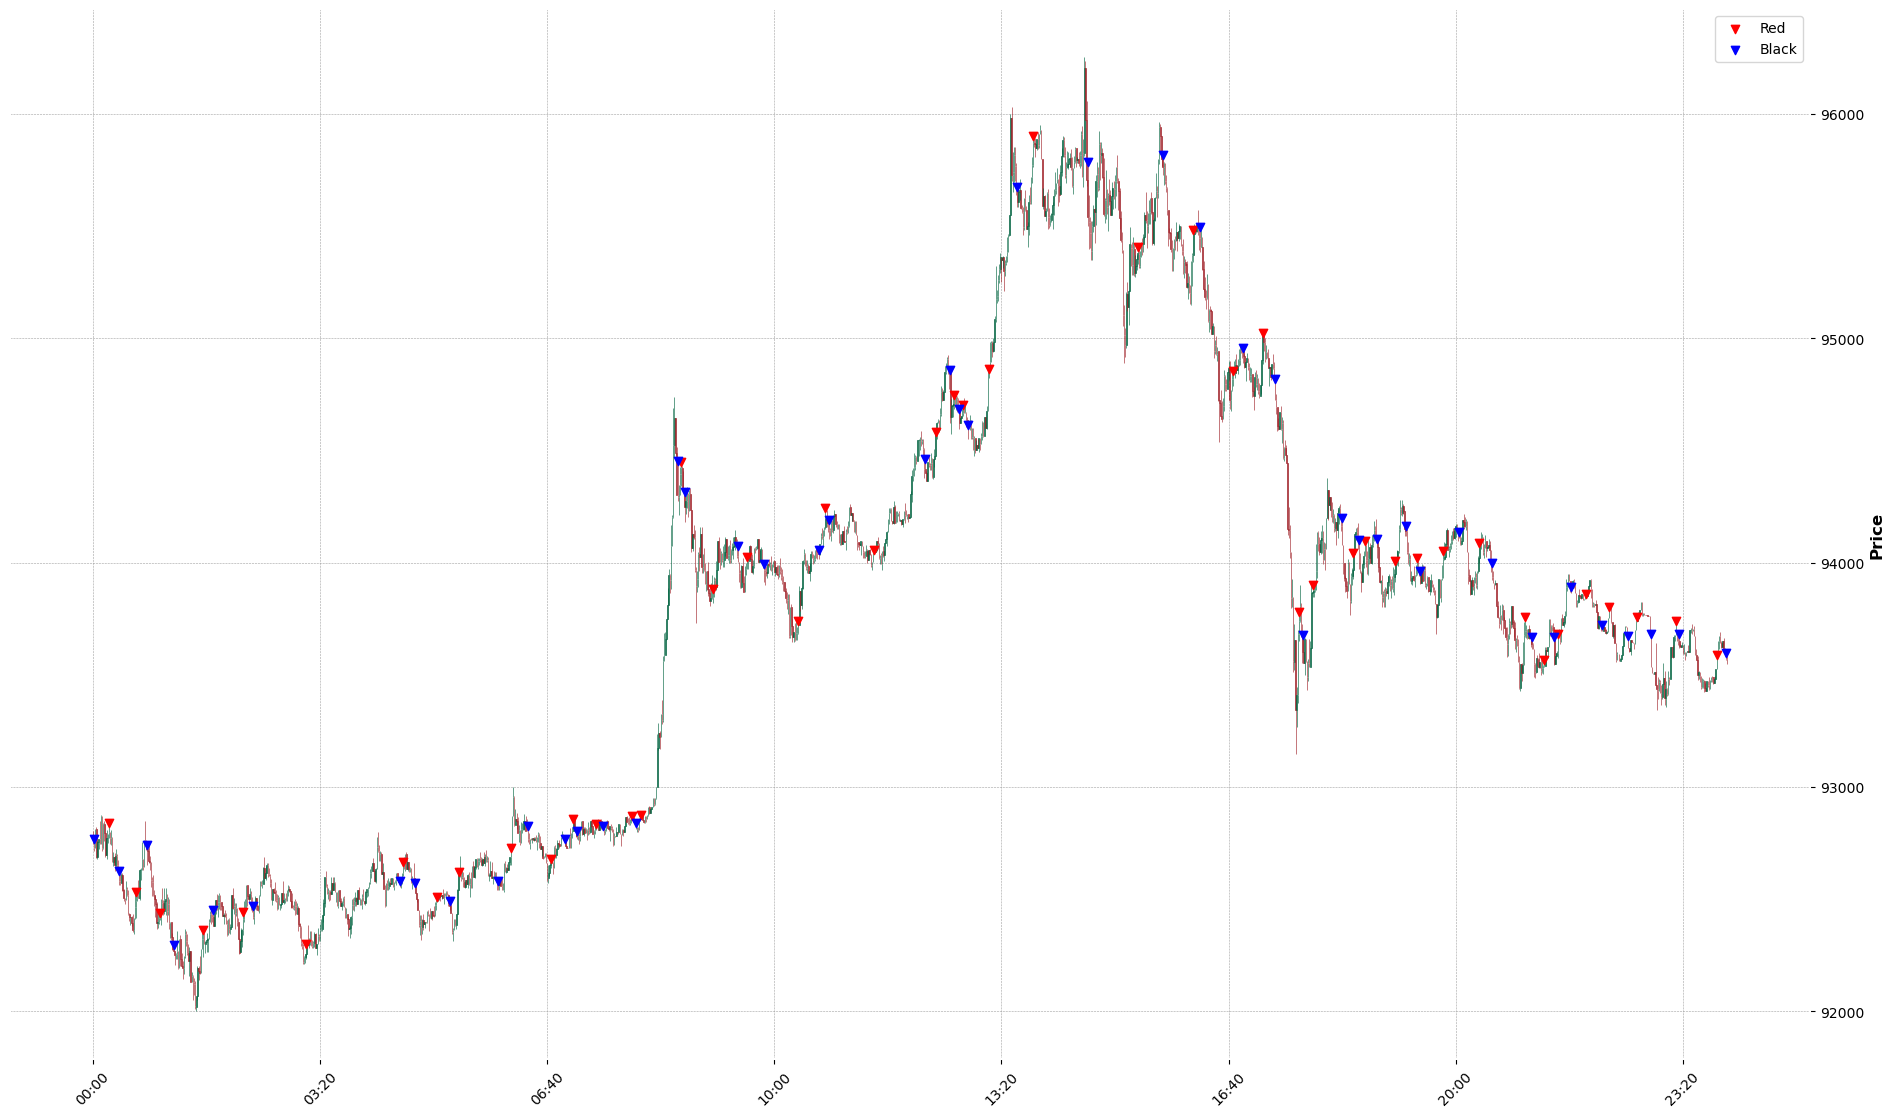

In [24]:
daily_list = create_daily_timestamp_list('2024-12-01', '2024-12-31')
pl = 100
current_position = None
for day in daily_list:
    df_day = df[df['day'] == day]
    index_list = df_day.index
    position_list = []
    for index, row in df_day.iterrows():

        current_idx = index_list.get_loc(index)

        if (current_idx+1 <len(df_day)) & (current_idx >= 1):
            next_index = index_list[current_idx+1]
            prior_index = index_list[current_idx-1]
            next_row = df_day.loc[next_index]
            prior_row = df_day.loc[prior_index]

            if row['red_black_3_candle'] == 'red':
                if current_position == None:
                    entry_price = next_row['Open']
                    current_position = 'red'
                    position_list.append('red')
                elif current_position == 'black':
                    current_position = 'red'
                    pl *= (1+((entry_price - row['Open'])/entry_price))
                    entry_price = next_row['Open']
                    position_list.append('red')
                elif current_position == 'red':
                    position_list.append(None)


            elif row['red_black_3_candle'] == 'black':
                if current_position == None:
                    entry_price = next_row['Open']
                    current_position = 'black'
                    position_list.append('black')
                elif current_position == 'red':
                    current_position = 'black'
                    pl *= (1+((row['Open'] - entry_price)/entry_price))
                    entry_price = next_row['Open']
                    position_list.append('black')
                elif current_position == 'black':
                    position_list.append(None)

            else:
                position_list.append(None)
            '''
            if (current_position == 'red') & (row['Close'] < prior_row['Open']):
                pl += next_row['Open'] - entry_price
                current_position = None


            elif (current_position == 'black') & (row['Close'] > prior_row['Open']):
                pl += entry_price - next_row['Open']
                current_position = None
            '''
        else:
            if current_position == 'red':
            # 매수 포지션 청산
                pl *= (1+((row['Open'] - entry_price)/entry_price))
                position_list.append(None)
            elif current_position == 'black':
            # 매도 포지션 청산
                pl *= (1+((entry_price - row['Open'])/entry_price))
                position_list.append(None)
            elif current_position == None:
                position_list.append(None)

    print(day, pl)  

    mpf_fig, mpf_axes = mpf.plot(
        df_day,
        type='candle',
        style='charles',
        volume=False,
        returnfig=True,
        figsize=(25, 15)
    )

    # 캔들 차트 축
    ax = mpf_axes[0]

    # red와 black 데이터 추출
    df_day['position'] = position_list
    red_points = df_day[df_day['position'] == 'red']
    black_points = df_day[df_day['position'] == 'black']
    

    # x축 좌표 생성 (mplfinance는 0부터 시작하는 정수로 x축을 매핑)
    x_coords = range(len(df_day))

    # 빨간색 화살표 추가 (red)
    for x, y in zip(x_coords, df_day['High']):
        if df_day['position'].iloc[x] == 'red':
            ax.scatter(
                x,
                y + 2,  # 캔들 위에 표시 (High 값보다 약간 위)
                color='red',
                label='Red' if 'Red' not in ax.get_legend_handles_labels()[1] else None,
                marker='v',  # 아래쪽 화살표
                zorder=5
            )

    # 파란색 화살표 추가 (black)
    for x, y in zip(x_coords, df_day['High']):
        if df_day['position'].iloc[x] == 'black':
            ax.scatter(
                x,
                y + 2,  # 캔들 위에 표시 (High 값보다 약간 위)
                color='blue',
                label='Black' if 'Black' not in ax.get_legend_handles_labels()[1] else None,
                marker='v',  # 아래쪽 화살표
                zorder=5
            )

    # 범례 추가
    ax.legend()

    # 차트 표시
    plt.show()


In [22]:
pl

420.9122766171082

In [13]:
date_list

['2024-11-14',
 '2024-11-15',
 '2024-11-16',
 '2024-11-17',
 '2024-11-18',
 '2024-11-19',
 '2024-11-20',
 '2024-11-21',
 '2024-11-22',
 '2024-11-23',
 '2024-11-24',
 '2024-11-25',
 '2024-11-26',
 '2024-11-27',
 '2024-11-28',
 '2024-11-29',
 '2024-11-30',
 '2024-12-01',
 '2024-12-02',
 '2024-12-03',
 '2024-12-04',
 '2024-12-05',
 '2024-12-06',
 '2024-12-07',
 '2024-12-08',
 '2024-12-09',
 '2024-12-10',
 '2024-12-11',
 '2024-12-12',
 '2024-12-13',
 '2024-12-14',
 '2024-12-15',
 '2024-12-16',
 '2024-12-17',
 '2024-12-18',
 '2024-12-19',
 '2024-12-20',
 '2024-12-21',
 '2024-12-22',
 '2024-12-23',
 '2024-12-24',
 '2024-12-25',
 '2024-12-26',
 '2024-12-27',
 '2024-12-28',
 '2024-12-29',
 '2024-12-30',
 '2024-12-31']